<a href="https://colab.research.google.com/github/Ktissada/Portfolio_Projects/blob/main/Autokz2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование авторынка Казахстана за 2019 год.

# Описание проекта.

## Цель проекта

Цель проекта — на основе предоставленных данных получить объективную картину авторынка Казахстана за 2019  год и на ее основе оценить позиции автосалона «Меркур Авто», выявить причины снижения выручки и определить возможности для роста продаж.

## Источники данных и описание

Данные о продажах автомобилей в Казахстане за 2019 год с подробной информацией по моделям, брендам, регионам и автосалонам.  

Данные содержат типичные проблемы: «шум», некорректные типы, неявные и явные дубли.

- Продажи автомобилей по месяцам 2019 года  
- Основные признаки:  
  - Год, месяц продажи  
  - Компания (автосалон)  
  - Бренд, модель  
  - Год выпуска, страна производства  
  - Модификация, вид топлива, объем двигателя, коробка передач, тип привода
  - Тип клиента, форма расчета
  - Сегмент, регион и область продажи  
  - Цена, количество проданных автомобилей, общая стоимость продажи в долларах
  - Сегментация 2013 – сегмент автомобиля актуальный
  - Класс 2013 – класс автомобиля актуальный

## Основные задачи проекта

1. Предобработка и очистка данных  
   - Стандартизация и кодирование признаков  
   - Обработка пропусков и дубликатов  
   - Формирование удобных форматов дат  

2. Исследовательский анализ (EDA)  
   - Анализ распределений и взаимосвязей  
   - Выявление аномалий и ключевых факторов  

3. Анализ рынка автомобилей в Казахстане  
   - Оценка емкости и динамики рынка по сегментам  
   - Анализ продаж по брендам, моделям, регионам и автосалонам  
   - Проверка гипотезы о зависимости цены от уровня развития региона  

4. Анализ позиции «Меркур Авто»  
   - Анализ выручки (общая, по маркам, ежемесячная)  
   - Продажи по регионам и маркам  
   - Конкурентный и BCG-анализ моделей  

5. Формирование выводов и рекомендаций для Заказчика

## Краткий план и этапы работы.

### 1. Подготовка и верификация данных
- Загрузка и первичный осмотр предоставленных данных.
- Удаление нерелевантных и избыточных столбцов:
  - `дилер`, `тип платежа`, `сегмент`, `сегмент eng`, `локализация`, `тип клиента`.
- Стандартизация наименований столбцов.
- Обработка пропущенных значений и работа с дубликатами.

### 2. Предобработка данных
- Преобразование страны производства в формат Alpha-3 (`RUS`, `KAZ`, `USA`).
- Стандартизация типов топлива: `F` (fuel), `D` (diesel), `E` (electro), `HYB` (hybrid).
- Приведение значений в столбцах `регион` и `область` к единому формату.
- Обработка дубликатов в `тип привода` и `название компании` (в т.ч. рус/англ варианты).
- Нормализация объёма двигателя: Замена запятой на точку; Удаление лишних символов (`L`); Коррекция аномальных значений (например, `400` л у Jaguar).
- Стандартизация трансмиссии:
  - Только два значения: `M`, `A`.
- Преобразование в категориальный тип:
  - `тип топлива`, `трансмиссия`, `тип привода`, `сегмент 2013`, `класс 2013`.
- Преобразование в числовой тип:
  - `стоимость`, `количество`, `итоговая стоимость` (учёт возвратов и аномалий).
- Обогощение данных: заполнение пропусков по техническим характеристикам, там где это возможно

### 3. Создание новых признаков
- Создание переменной `sale_date` на основе года и месяца (первый день месяца).
- Добавления столбца `sales_kus` в тыс. долл для удобства анализа.
- Добавляем столбец `full_model_name` для удобства анализа и визуализации.
- Удалим лишние и вспомогательные столбцы.

### 4. Анализ рынка автомобилей Казахстана
- Динамика рынка: Общая и по сегментам.
- Расчёт ёмкости рынка: В денежном и количественном выражении.
- Продажи:
  - В разрезе брендов, моделей, сегментов, регионов, автоцентров.
- Определение лидеров:
  - По брендам и моделям.
- Проверка гипотезы:
  - Зависимость стоимости автомобиля от уровня развития региона (по средней зарплате).

### 5. Анализ положения компании "Меркур Авто"
- Анализ выручки: Общая, по маркам, средняя, ежемесячная, ежемесячная по маркам.
- Продажи по регионам: Общие и по маркам.
- Конкурентный анализ: Создать портрет автосалона, на основе него сравненить с другими автоцентрами.
- BCG-анализ моделей: Оценка позиций моделей по доле рынка и темпам роста.

# Инструменты и технологии.

 - Язык: Python

 - Библиотеки: pandas, numpy, matplotlib, seaborn, scipy, functools, re

 - Среда разработки: Google Colab / Jupyter Notebook

# Настройка окружения.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from functools import reduce
import re

In [172]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.0f}'.format)

In [173]:
# Настройки стиля и палитры для графиков
sns.set_theme(style='whitegrid', palette='Paired')

# Параметры отображения графиков через rcParams
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [174]:
# Функция для добавления подписей на график
def add_labels(ax, fmt='{:.0f}'):
    for container in ax.containers:
        ax.bar_label(container, fmt=fmt, label_type='edge', padding=3)

# Получение данных.

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
!ls "/content/drive/MyDrive/Colab Notebooks/Autokz2019"

 autokz2019.csv
'Autokz2019_проверка.ipynb copy.ipynb'
'Copy of Autokz2019.ipynb'
'Copy of Untitled146.ipynb'
'Copy of Копия блокнота "Untitled0.ipynb"'


In [177]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Autokz2019/autokz2019.csv',
                 decimal=',', sep=';')

df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,"28,115","28,115",г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1,"32,247","32,247",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,"32,000","32,000",г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1,"31,929","31,929",г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1,"31,929","31,929",г.Алматы,Легковые автомобили,D класс,D,Импорт


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

В датафрэйме 25 столбцов и 39966 записей. Сразу видим названия столбцов на русском, переименуем названия столбцов чтобы в дальнейшем работать с обновленным датафрэймом.

### Переименуем названия столбцов.

In [179]:
df = df.rename(columns={
    'Год': 'year',
    'Месяц': 'month',
    'Компания': 'company',
    'Бренд': 'brand',
    'Модель': 'model',
    'Модификация': 'modification',
    'Год выпуска': 'production_year',
    'Страна-производитель': 'country_of_origin',
    'Вид топлива': 'fuel_type',
    'Объём двиг, л,': 'engine_volume_liters', # Обратите внимание на удаление запятых и "л"
    'Коробка передач': 'transmission_type',
    'Тип привода': 'drive_type',
    'Сегмент': 'segment',
    'Регион': 'region',
    'Наименование дилерского центра': 'dealership_name',
    'Тип клиента': 'client_type',
    'Форма расчета': 'payment_method',
    'Количество': 'quantity',
    'Цена, USD': 'price_usd',
    'Продажа, USD': 'sales_usd',
    'Область': 'oblast',
    'Сегментация 2013': 'segmentation_2013',
    'Класс 2013': 'class_2013',
    'Сегментация Eng': 'segmentation_eng', # Если это уже английская сегментация, можно оставить или упростить
    'Локализация производства': 'production_localization' # Удалил лишний символ
})
df.head()

,year,month,company,brand,model,modification,production_year,country_of_origin,fuel_type,engine_volume_liters,transmission_type,drive_type,segment,region,dealership_name,client_type,payment_method,quantity,price_usd,sales_usd,oblast,segmentation_2013,class_2013,segmentation_eng,production_localization
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,"28,115","28,115",г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1,"32,247","32,247",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,"32,000","32,000",г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1,"31,929","31,929",г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1,"31,929","31,929",г.Алматы,Легковые автомобили,D класс,D,Импорт


Теперь названия столбцов корректны.

### Получение общей информации о данных.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     39966 non-null  int64  
 1   month                    39966 non-null  object 
 2   company                  39966 non-null  object 
 3   brand                    39966 non-null  object 
 4   model                    39966 non-null  object 
 5   modification             36375 non-null  object 
 6   production_year          39465 non-null  object 
 7   country_of_origin        39966 non-null  object 
 8   fuel_type                36826 non-null  object 
 9   engine_volume_liters     35708 non-null  object 
 10  transmission_type        36711 non-null  object 
 11  drive_type               35677 non-null  object 
 12  segment                  33205 non-null  object 
 13  region                   39966 non-null  object 
 14  dealership_name       

В данных имеются пропуски в некоторых столбцах. Стоит обратить внимание на некорректный тип данных в столбцах, в которых должен быть числовой тип данных.

In [181]:
df.isna().sum()

,0
year,0
month,0
company,0
brand,0
model,0
modification,3591
production_year,501
country_of_origin,0
fuel_type,3140
engine_volume_liters,4258


Итак есть значительное количество пропусков в 9 важных столбцах, таких как production_year, fuel_type, engine_volume_liters, transmission_type, drive_type, payment_method и client_type. Заполнение пропусков займемся после стандартизации типов данных в столбцах и отчистки от "мусорных" значений.

# Предобработка данных.

### Удалим столбцы содержащие избыточную информацию или критическое количество пропусков.

После загрузки исходных данных был проведен первичный анализ их структуры и качества. Выявлены столбцы, которые не несут аналитической ценности для целей данного исследования, содержат избыточную или дублирующуюся информацию, либо имеют большое количество пропусков. Принято решение об удалении следующих столбцов:

 - **`client_type`** Тип клиента - юр. лицо или физ. лицо. В данном столбце много пропусков около 7 тыс. и достоверно заполнить их нельзя.
 - **`segment` и `segmentation_eng`:** Оба столбца были удалены, так как информация о сегменте автомобиля более полно и актуально представлена в столбцах `segment_2013` и `class_2013`, которые будет использоваться в дальнейшем анализе. `segmentation_Eng` является прямым англоязычным дубликатом Сегмента и также не несет новой информации.
 - **`dealership_name`:** Столбец дублирует информацию, уже представленную в `company`, хотя и включает дополнительные детали о городе. Для данного анализа эти дополнительные детали не критичны, а данные о регионе и области доступны в отдельных столбцах (`region`, `oblast`).
 - **`payment_method`** содержит больше всего пропущенных значений - 25928 пропусков, что делает его непригодным для любого надежного анализа или использования.

In [182]:
# Список столбцов для удаления
columns_to_drop = [
    'client_type',
    'segment',
    'segmentation_eng',
    'dealership_name',
    'payment_method'
]

# Проверяем, существуют ли все столбцы из списка в DataFrame перед удалением
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if len(existing_columns_to_drop) < len(columns_to_drop):
    print(f"Внимание: Не все столбцы из списка для удаления найдены в DataFrame. Отсутствуют: {set(columns_to_drop) - set(existing_columns_to_drop)}")

df = df.drop(columns=existing_columns_to_drop)

print(f"\nСтолбцы успешно удалены. Новый размер DataFrame: {df.shape}")
print("Обновленный список столбцов:")
df.columns.tolist()


Столбцы успешно удалены. Новый размер DataFrame: (39966, 20)
Обновленный список столбцов:


['year',
 'month',
 'company',
 'brand',
 'model',
 'modification',
 'production_year',
 'country_of_origin',
 'fuel_type',
 'engine_volume_liters',
 'transmission_type',
 'drive_type',
 'region',
 'quantity',
 'price_usd',
 'sales_usd',
 'oblast',
 'segmentation_2013',
 'class_2013',
 'production_localization']

Удаление прошло успешно, в обновленном датафрэйме 20 столбцов с уникальной информацией.

### Проверим датафрэйм на наличие явных дубликатов.

In [183]:
df.duplicated().sum()

np.int64(21928)

Такая высокая цифра явных дубликатов, объяснима. Один салон продает несколько идентичных автомобилей за определенный период. Так как у каждой продажи нет явного идентификатора, то эти строки нельзя считать дубликатами. Поэтому оставляем все как есть и исследуем каждый столбец по отдельности.

## Работа с неявными дубликатами, "мусорными" значениями и стандартизация значений.

#### Кодирование стран в столбце `country_of_origin` в формат Alpha-3.

В данном столбце нет пропуков, поэтому смотрим все уникальные значения стран производителей автомобилей. Создаем словарь для маппинга оригинальных названий стран в Alpha-3 коды. Проверяем корректность выполнения замены.

In [184]:
# Посмотрим страны производители которые присутствуют в наших данных
df['country_of_origin'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [185]:
# Создадим словарь для маппинга оригинальных названий стран в Alpha-3 коды
country_alpha3_map = {
    'Германия': 'DEU',
    'США': 'USA',
    'Австрия': 'AUT',
    'Республика Казахстан': 'KAZ',
    'Российская Федерация': 'RUS',
    'Корея': 'KOR', # Принимаем как Южная Корея
    'Япония': 'JPN',
    'Таиланд': 'THA',
    'Китай': 'CHN',
    'UK': 'GBR', # Великобритания
    'Узбекистан': 'UZB',
    'Венгрия': 'HUN',
    'Турция': 'TUR',
    'Испания': 'ESP',
    'Нидерланды': 'NLD',
    'Польша': 'POL',
    'Швеция': 'SWE',
    'Белоруссия': 'BLR', # Беларусь
    'Бельгия': 'BEL'
}


df['country_of_origin'] = df['country_of_origin'].map(country_alpha3_map)
df['country_of_origin'].unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN',
       'GBR', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR',
       'BEL'], dtype=object)

Кодировка прошла успешно.

#### Кодирование `fuel_type` в стандартизированные категории.

Закодируем тип топлива в стандартизированные категории: F - fuel, D - diesel, E - electro, HYB - hybrid. Посмотрим уникальные значения в столбце `fuel_type`.

In [186]:
df['fuel_type'].unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

Присутствуют различные написания одного и того же типа топлива (например, 'Бензин' и 'бензин ', 'Дизель' и 'дизель ', 'Электро' и 'Электричество'). Это создает дубликаты, которые будут некорректно учитываться при анализе. Так же есть числовые данные.
 - Заменим тип топлива на стандартные значения: 'F' для бензина, 'D' для дизеля, 'E' для электричества, 'HYB' для гибрида.
 - Срез по числовым данным, если таких значений мало, заменим на пропуски.

In [187]:
df['fuel_type'] = df['fuel_type'].astype(str).str.lower().str.strip()
# Словарь для стандартизации известных типов топлива
fuel_type_mapping = {
    'бензин': 'F',
    'дизель': 'D',
    'электро': 'E',
    'электричество': 'E',
    'гибрид': 'HYB',
    'nan': np.nan # Если np.nan превратился в строку 'nan'
}
df['fuel_type'] = df['fuel_type'].replace(fuel_type_mapping)

In [188]:
values_to_remove = ['2', '1,6', '0']
df_specific_numeric_fuel_types = df[df['fuel_type'].isin(values_to_remove)]
df_specific_numeric_fuel_types.shape

(40, 20)

Строк содержащих "мусорные" числовые данные в типе двигателя всего 40, удалим эти строки из таблицы.

In [189]:
mask_to_remove = df['fuel_type'].astype(str).isin(values_to_remove)
df = df[~mask_to_remove]
print(df['fuel_type'].unique())
f"Новое количество строк в DataFrame: {df.shape[0]}"

['F' 'D' nan 'HYB' 'E']


'Новое количество строк в DataFrame: 39926'

В данных остались только стандартизированные виды топлива.

#### Приведение столбцов `region` и `oblast` к единому формату (нижний регистр с заглавной буквы).

Смотрим уникальные значения в этих двух столбцах.

In [190]:
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

Все названия указаны корректно, кроме `ЭКСПОРТ` заменим только его.

In [191]:
df['region'] = df['region'].replace('ЭКСПОРТ', 'Экспорт')

In [192]:
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'Экспорт', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

#### Стандартизация столбца `drive_type`.

In [193]:
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

Приведем все эти варианты к четырём основным:
 - FWD (Front-Wheel Drive): Передний привод. Мощность двигателя передаётся только на передние колёса.
 - RWD (Rear-Wheel Drive): Задний привод. Мощность двигателя передаётся на задние колёса.
 - 4WD (Four-Wheel Drive): Полный привод. Мощность может передаваться на все четыре колеса. Традиционно используется во внедорожниках и грузовиках.
 -  Всё остальное, что не вписывается и при этом не являются NaN (например, '4х2.2', 'Астана', '0', '#Н/Д'), заменим на np.nan.

In [194]:
df['drive_type'] = df['drive_type'].astype(str).str.lower().str.strip()

standard_drive_type_mapping = {
    'FWD': ['передний', 'fwd', 'передний (ff)', 'ff', '2 wd', '2wd'],   # Обычно 2WD для легковых - это передний
    'RWD': ['задний','rwd'],
    '4WD': ['полный','4wd','awd','4x4','4х4', '4 wd', 'quattro', '4motion'] # 'quattro' - Audi; '4motion' - Volkswagen
}

reverse_map = {}
for standard_name, variations in standard_drive_type_mapping.items():
    for var in variations:
        reverse_map[var] = standard_name

df['drive_type'] = df['drive_type'].replace(reverse_map)
valid_drive_types = ['FWD', 'RWD', '4WD']
df.loc[~df['drive_type'].isin(valid_drive_types) & (df['drive_type'] != 'nan'), 'drive_type'] = np.nan
df['drive_type'] = df['drive_type'].replace('nan', np.nan)
df['drive_type'].unique()

array(['FWD', '4WD', 'RWD', nan], dtype=object)

#### Стандартизация столбца `company`.

In [195]:
sorted(df['company'].unique())

['Allur Auto',
 'Almaty Motors Premium',
 'Astana Motors',
 'Astana Motors ',
 'Autokapital',
 'Caspian Motors',
 'Daewoo Bus Kazakhstan',
 'Eurasia Motor Premium',
 'Hino Motors ',
 'Hyundai Com Trans Kazakhstan ',
 'MAN Truck & Bus Kazakhstan',
 'MMC RUS',
 'Mercur Auto',
 'Mercur Autos',
 'Nissan Manufacturing RUS',
 'Ravon Motors Kazakstan',
 'Renault Россия',
 'Scandinavian Motors',
 'Scania Central Asia',
 'Subaru Kazakhstan',
 'TERRA MOTORS',
 'Toyota Motor Kazakhstan',
 'Volkswagen Group Rus',
 'Автодом Motors KST',
 'Автокапитал',
 'Автомир ГК',
 'Автомир-Центр',
 'Автоцентр-Бавария',
 'БИПЭК АВТО',
 'Вираж',
 'Каспиан Моторс',
 'Лифан Моторс Рус',
 'ММС Рус',
 'Равон Моторс Казахстан',
 'СВС-ТРАНС',
 'СемАЗ',
 'ТК КАМАЗ',
 'ТОО "Eurasia Motor Zhaik"',
 'УзАвто-Казахстан',
 'Хино Моторс Казахстан']

Часть названий на английском часть на русском, приведем все к единому виду на английском языке в нижнем регистре. Чтобы избежать любых проблем с регистром и обеспечить максимальную согласованность, мы сделаем все ключи словаря standard_company_mapping полностью в нижнем регистре.

In [196]:
df['company'] = df['company'].astype(str).str.strip().str.lower()

# Ключ = Стандартное название
# Значение = Список всех вариантов (в нижнем регистре), которые нужно привести к этому стандарту
standard_company_mapping = {
    'allur auto': ['allur auto'],
    'almaty motors premium': ['almaty motors premium'],
    'astana motors': ['astana motors'],
    'autocenter bavaria': ['автоцентр-бавария', 'autocenter bavaria'],
    'autokapital': ['autokapital', 'автокапитал'],
    'avtodom motors kst': ['автодом motors kst', 'avtodom motors kst'],
    'avtomir gk': ['автомир гк', 'автомир-центр'],
    'bipek auto': ['бипэк авто', 'bipek auto'],
    'caspian motors': ['caspian motors', 'каспиан моторс'],
    'daewoo bus kazakhstan': ['daewoo bus kazakhstan'],
    'eurasia motor': ['eurasia motor premium', 'тоо "eurasia motor zhaik"'],
    'hino motors kazakhstan': ['хино моторс казахстан', 'hino motors'],
    'hyundai com trans kazakhstan': ['hyundai com trans kazakhstan'],
    'lifan motors rus': ['лифан моторс рус'],
    'mms rus': ['ммс рус', 'mmc rus'],
    'man truck & bus kazakhstan': ['man truck & bus kazakhstan'],
    'mercur auto': ['mercur auto', 'mercur autos'],
    'nissan manufacturing rus': ['nissan manufacturing rus'],
    'ravon motors kazakhstan': ['ravon motors kazakstan', 'ravon motors kazakhstan', 'равон моторс казахстан'],
    'renault russia': ['renault россия'],
    'svs-trans': ['свс-транс'],
    'scandinavian motors': ['scandinavian motors'],
    'scania central asia': ['scania central asia'],
    'semaz': ['семаз'],
    'subaru kazakhstan': ['subaru kazakhstan'],
    'tk kamaz': ['тк камаз'],
    'terra motors': ['terra motors'],
    'toyota motor kazakhstan': ['toyota motor kazakhstan'],
    'uzauto kazakhstan': ['узавто-казахстан'],
    'virazh': ['вираж', 'virazh'],
    'volkswagen group rus': ['volkswagen group rus']
}

# Создаем обратный словарь для .replace():
reverse_mapping = {}
for standard_name, variations in standard_company_mapping.items():
    for var in variations:
        reverse_mapping[var] = standard_name

# Применяем замены
df['company'] = df['company'].replace(reverse_mapping)

# Опционально: замена оставшихся непереведенных 'nan' строк в np.nan
df['company'] = df['company'].replace('nan', np.nan)
df['company'].unique()

array(['mercur auto', 'autocenter bavaria', 'bipek auto', 'virazh',
       'eurasia motor', 'daewoo bus kazakhstan', 'caspian motors',
       'semaz', 'astana motors', 'hyundai com trans kazakhstan',
       'nissan manufacturing rus', 'svs-trans', 'allur auto',
       'almaty motors premium', 'terra motors', 'tk kamaz',
       'toyota motor kazakhstan', 'lifan motors rus',
       'man truck & bus kazakhstan', 'avtomir gk', 'autokapital',
       'mms rus', 'uzauto kazakhstan', 'ravon motors kazakhstan',
       'renault russia', 'scania central asia', 'subaru kazakhstan',
       'volkswagen group rus', 'avtodom motors kst',
       'scandinavian motors', 'hino motors kazakhstan'], dtype=object)

Стандартизация прошла корректно.

#### Преобразуем тип данных в столбце `production_year`.

`production_year` (Год выпуска): Сейчас `object`, но должен быть числом (`int64`). Вероятно, содержит нечисловые символы или пропуски, которые нужно будет очистить и преобразовать.

In [197]:
df['production_year'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

Видим, что в некоторых строках встречается неразрывный пробел: '2\xa0018', '2\xa0019'. Такой пробел может появляться при копировании данных из документов (например, PDF, Word, Excel) или веб-страниц. Заменим значения в этих ячейках на 2018 и 2019 соответственно. Так же в этом столбце встречается `nan`, оставим как NaN для последующей обработки.

In [198]:
df['production_year'] = pd.to_numeric(
    df['production_year']
      .astype(str)
      .str.replace('\xa0', '', regex=False)
      .str.strip(),
    errors='coerce'
).astype('Int16')
df['production_year'].unique()

<IntegerArray>
[2018, 2017, 2019, <NA>, 2016, 2014, 2013, 2011]
Length: 8, dtype: Int16

#### Нормализуем столбец `engine_volume_liters` и преобразуем тип данных в числовой.

Тип данных в столбце `engine_volume_liters` (Объём двиг, л) - `object`, но должен быть числом (`float64`). Вероятно, содержит десятичные запятые, лишние символы или текстовые значения, которые требуют очистки перед преобразованием.

In [199]:
df['engine_volume_liters'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

**Вывод**

Столбец `engine_volume_liters` содержит разнообразные нечисловые значения:
  - некоторые десятичные числа с запятыми, некоторые с точками,
  - текстовые данные (например, `Turbo`, `CRDI`,`Л.С.`, `KWH`, `L`), возможно это дополнительная техническая информация об автомобиле, но так как эти данные не по всем автомобилям в таблице и похоже она излишняя, оставляем только числовую информацию об объеме двигателя.
  - '400 Л.С.' - это похоже на `400 лошадиных сил`.
  
Необходимо заменить все запятые на точки, удалить лишнюю текстовую информацию и преобразовать отчищенные данные в числовой формат.

In [200]:
df['engine_volume_liters'] = (
    df['engine_volume_liters']
    .fillna('')
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.extract(r'([0-9.]+)', expand=False)
    .pipe(pd.to_numeric, errors='coerce')
    .round(1)
)
print(df['engine_volume_liters'].unique())
df['engine_volume_liters'].isna().sum()

[  1.4   2.    3.    4.4   6.6   1.5   1.6   2.4   1.7  26.7  25.7  24.7
  23.7  22.7  21.7  20.7  19.7  18.7  17.7  16.7  15.7  14.7  13.7  12.7
  11.7  10.7   9.7   8.7   7.7   6.7   5.7   4.7   3.7   2.7   6.2   2.5
   nan   2.8   4.3   3.9   7.5  12.3   3.5   5.6   5.2   5.    1.2   3.3
   1.8   4.6  10.5   4.    5.5  12.   12.8  11.    2.2  13.    1.3   3.8
   3.6   7.6   4.9   2.9 400.   88.    8.4   6.5]


np.int64(4263)

Весь не числовой "мусор" ушел, теперь более пристально поработаем с числами. Оценим выбросы построив график box-plot.

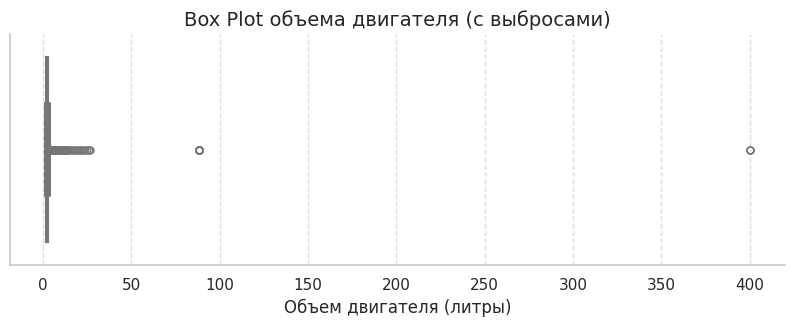

In [201]:
plt.figure(figsize=(10, 3)) # Box Plot часто делают более узким
# Box Plot по умолчанию вертикальный, если не указать orient='h'
sns.boxplot(data=df, x='engine_volume_liters', fliersize=5, linewidth=1.5)
plt.title('Box Plot объема двигателя (с выбросами)')
plt.xlabel('Объем двигателя (литры)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

На графике четко видно два выброса. Это значения - 88 и 400 видно из уникальных значений отобранных ранее.

In [202]:
df[df['engine_volume_liters'].isin([88.0, 400.0])].head()

,year,month,company,brand,model,modification,production_year,country_of_origin,fuel_type,engine_volume_liters,transmission_type,drive_type,region,quantity,price_usd,sales_usd,oblast,segmentation_2013,class_2013,production_localization
39544,2019,Февраль,almaty motors premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,GBR,E,400,РЕДУКТОР,4WD,Алматы,1,"117,237","117,237",г.Алматы,Внедорожники,Компактные SUV,Импорт
39545,2019,Апрель,almaty motors premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,GBR,E,400,РЕДУКТОР,4WD,Алматы,1,"105,389","105,389",г.Алматы,Внедорожники,Компактные SUV,Импорт
39546,2019,Июнь,almaty motors premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,GBR,E,400,РЕДУКТОР,4WD,Алматы,1,"120,413","120,413",г.Алматы,Внедорожники,Компактные SUV,Импорт
39818,2019,Июль,allur auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88,NaN,FWD,Костанай,1,"307,986","307,986",Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство
39819,2019,Июль,allur auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88,NaN,FWD,Костанай,1,"307,986","307,986",Костанайская область,Коммерческие автомобили,Большие автобусы,Локальное производство



**Вывод:** Анализ записей с "объемом двигателя" в 400 Л.С. и 88 KWH убедительно показывает, что эти значения относятся не к литражу двигателя внутреннего сгорания, а к мощности (лошадиные силы) и ёмкости батареи (киловатт-часы) соответственно. Это предположение подтверждается дополнительной информацией в данных, такой как тип топлива fuel_type - "E" (Электрический). Для таких транспортных средств, как Jaguar I-Pace (электромобиль) и Ankai HFF6124G03EV3 (электробус), концепция "объема двигателя в литрах" неприменима.

Следовательно, для электромобилей и электробусов в столбце engine_volume_liters должны быть пропуски (NaN). Это необходимо для корректности данных и предотвращения искажений при дальнейшем анализе числовых объемов двигателей.

In [203]:
df.loc[df['engine_volume_liters'].isin([88.0, 400.0]), 'engine_volume_liters'] = np.nan

Построим еще рах график box-plot для оценки выбросов и проверки результата выполнения предыдущей команды.

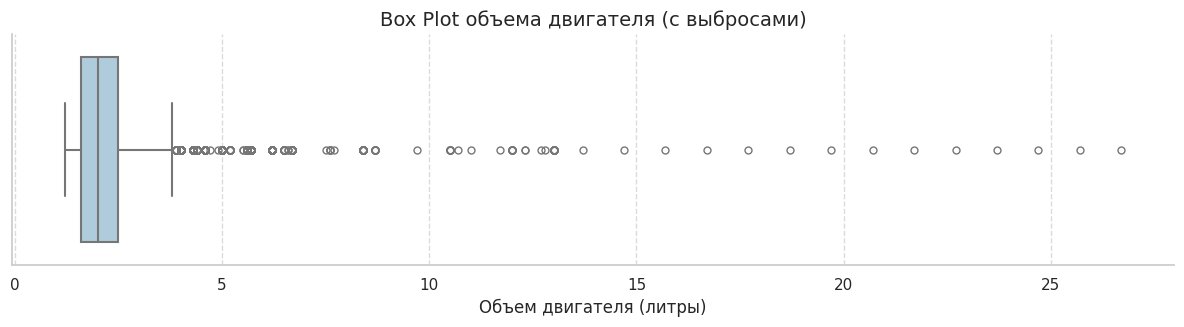

In [204]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='engine_volume_liters', fliersize=5, linewidth=1.5)
plt.title('Box Plot объема двигателя (с выбросами)')
plt.xlabel('Объем двигателя (литры)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Анализ графика Box Plot по объёму двигателя**
 - Основной диапазон (1-3 литра): Это вполне ожидаемый и типичный диапазон объёмов двигателей для большинства легковых автомобилей на массовом рынке.
 - Крупногабаритные автомобили (больше 3 литров): Да, значения до 8-13 литров вполне могут соответствовать мощным внедорожникам, пикапам, спортивным или люксовым автомобилям. Для них большие объёмы двигателя нормальны.
 - После объема двигателя равного 13 - выбросы выглядят странно: они распологаются с идентичным шагом до 27. Возможно это ошибка ввода данных. Нужно проверить их отдельно.

In [205]:
(
    df[df['engine_volume_liters'] > 13]
    [['brand', 'model', 'production_year', 'fuel_type', 'engine_volume_liters',
      'transmission_type', 'drive_type', 'segmentation_2013', 'class_2013']]
    .drop_duplicates()
    .sort_index()
)

,brand,model,production_year,fuel_type,engine_volume_liters,transmission_type,drive_type,segmentation_2013,class_2013
399,Chevrolet,Niva,2019,F,27,MT,4WD,Внедорожники,Субкомпактные SUV
400,Chevrolet,Niva,2019,F,26,MT,4WD,Внедорожники,Субкомпактные SUV
401,Chevrolet,Niva,2019,F,25,MT,4WD,Внедорожники,Субкомпактные SUV
402,Chevrolet,Niva,2019,F,24,MT,4WD,Внедорожники,Субкомпактные SUV
403,Chevrolet,Niva,2019,F,23,MT,4WD,Внедорожники,Субкомпактные SUV
404,Chevrolet,Niva,2019,F,22,MT,4WD,Внедорожники,Субкомпактные SUV
405,Chevrolet,Niva,2019,F,21,MT,4WD,Внедорожники,Субкомпактные SUV
406,Chevrolet,Niva,2019,F,20,MT,4WD,Внедорожники,Субкомпактные SUV
407,Chevrolet,Niva,2019,F,19,MT,4WD,Внедорожники,Субкомпактные SUV
408,Chevrolet,Niva,2019,F,18,MT,4WD,Внедорожники,Субкомпактные SUV


В эти аномалии попали только автомобили Chevrolet Niva. Из таблицы видна систематическая ошибка ввода данных, вероятно связанная с автозаполнением в Excel. Сделаем срез по этой модели для полной проверки.

In [206]:
df[(df['brand'] == 'Chevrolet') & (df['model'] == 'Niva')][['brand', 'model', 'production_year', 'fuel_type', 'engine_volume_liters',
      'transmission_type', 'drive_type', 'segmentation_2013', 'class_2013']].drop_duplicates().sort_index()

,brand,model,production_year,fuel_type,engine_volume_liters,transmission_type,drive_type,segmentation_2013,class_2013
264,Chevrolet,Niva,2017,F,2,MT,4WD,Внедорожники,Субкомпактные SUV
265,Chevrolet,Niva,2018,F,2,MT,4WD,Внедорожники,Субкомпактные SUV
365,Chevrolet,Niva,2019,F,2,MT,4WD,Внедорожники,Субкомпактные SUV
399,Chevrolet,Niva,2019,F,27,MT,4WD,Внедорожники,Субкомпактные SUV
400,Chevrolet,Niva,2019,F,26,MT,4WD,Внедорожники,Субкомпактные SUV
401,Chevrolet,Niva,2019,F,25,MT,4WD,Внедорожники,Субкомпактные SUV
402,Chevrolet,Niva,2019,F,24,MT,4WD,Внедорожники,Субкомпактные SUV
403,Chevrolet,Niva,2019,F,23,MT,4WD,Внедорожники,Субкомпактные SUV
404,Chevrolet,Niva,2019,F,22,MT,4WD,Внедорожники,Субкомпактные SUV
405,Chevrolet,Niva,2019,F,21,MT,4WD,Внедорожники,Субкомпактные SUV


Наша догадка подтвердилась - начиная с 2,7 литров в остальных строках по порядку объем двигателя увеличивался на единицу.
Согласно техническим характеристикам, Chevrolet Niva оснащалась следующими двигателями:
 - **Основной двигатель:** 1.7 литра (1690 см³) — это самый распространенный вариант.
 - **Редкий вариант** (для некоторых экспортных или специальных версий): 1.8 литра (например, двигатель Opel Z18XE мощностью 125 л.с.). Этот вариант гораздо реже встречается.

Исправим ошибку заполнения, заменим все данные по этой модели на 1,7 литра.

In [207]:
df.loc[(df['brand'] == 'Chevrolet') & (df['model'] == 'Niva'), 'engine_volume_liters'] = 1.7
# проверка результата
df[(df['brand'] == 'Chevrolet') & (df['model'] == 'Niva')]['engine_volume_liters'].unique()

array([1.7])

Замена прошла корректно. Оценим уникальные значения в столбце `engine_volume_liters`, после преобразований.

In [208]:
print(df['engine_volume_liters'].unique())
df['engine_volume_liters'].isna().sum()

[ 1.4  2.   3.   4.4  6.6  1.5  1.6  2.4  1.7  6.2  2.5  nan  2.7  2.8
  4.3  3.9  7.5 12.3  3.5  5.6  8.7  5.2  5.   1.2  3.3  1.8  4.6  5.7
 10.5  4.   5.5 12.  12.8 11.   2.2 13.   1.3  3.8  3.6  7.6  4.9  2.9
  8.4  6.7  6.5]


np.int64(4276)

После обработки этого столбца количество пропусков увеличилось с 4258 до 4276. Это допустимое значение, пропуски обработаем в дальнейшем.

#### Стандартизация столбца `transmission_type`.

In [209]:
print("Уникальные значения 'transmission_type':")
print(df['transmission_type'].unique())
print("-" * 50)

print("Количество пропусков в 'transmission_type':")
print(df['transmission_type'].isna().sum())
print("-" * 50)

Уникальные значения 'transmission_type':
['S-tronic' 'S-Tronic' 'Tiptronic' 'АКПП' 'АКП' 'Steptronic' 'AT' '6 АТ'
 '5 МТ' '6АТ' 'MT' '8AT' '5МТ' 'Powershift S6' '6AT' nan 'Мех.' '6 AT'
 '6 MT' '6MT' '5 AT' '5AT' 'МКПП' '7 DCT' '7DCT' '8 AT' 'МТ' 'CVT' 'DCT'
 '4 АТ' '6 МТ' '6МТ' '4АТ' '4AT' '8АТ' '8 АТ' '5MT' 'AMT' 'CVT (вариатор)'
 'CVT (вариATор)' 'CVT(вAриATор)' '7G-TRONIC' '9G-TRONIC' '12AT' '12АТ'
 '5АТ' '7АТ' '7AT' '6M/T' 'PDK' '8-ступ АКПП' '8' '8АКПП'
 '8 АКПП Tiptronic S' '7 АКПП (PDK)' '7 АКПП PDK' '8 АКПП (PDK)' 'АТ' 'АT'
 'МT' '7 DSG' '7DSG' '6 DSG' '6DSG' '#Н/Д' 'DSG' '6A' '6А' '5M' 'A/T'
 'M/T' 'МКП' '5М' 'М/T' ' 7 АКП' '7АКП' 'А/T' '8A' 'TDI' '9AT' 'РЕДУКТОР']
--------------------------------------------------
Количество пропусков в 'transmission_type':
3255
--------------------------------------------------


Столбец `transmission_type` содержит много вариантов написания, которые нужно привести к двум основным категориям: "Manual" (Механика) и "Automatic" (Автомат). Для понимания категории трансмиссии нужна числовая и текстовая информация, поэтому для снижения вероятности ошибок замены. Приведем все к нижнему регистру, удалим все пробелы.

In [210]:
df['transmission_type'] = (
    df['transmission_type']
    .astype(str)  # Сначала убедимся, что все значения - строки (NaN станет 'nan')
    .str.replace(' ', '') # : используем .str.replace
    .str.strip()  # Это уже не так критично после .str.replace, но не повредит для крайних случаев
    .str.lower()  # Приводим к нижнему регистру
)
print("Количество пропусков в 'transmission_type':")
print(df['transmission_type'].isna().sum())
print("-" * 50)
df['transmission_type'].unique()

Количество пропусков в 'transmission_type':
0
--------------------------------------------------


array(['s-tronic', 'tiptronic', 'акпп', 'акп', 'steptronic', 'at', '6ат',
       '5мт', 'mt', '8at', 'powershifts6', '6at', 'nan', 'мех.', '6mt',
       '5at', 'мкпп', '7dct', 'мт', 'cvt', 'dct', '4ат', '6мт', '4at',
       '8ат', '5mt', 'amt', 'cvt(вариатор)', 'cvt(вариatор)',
       'cvt(вaриatор)', '7g-tronic', '9g-tronic', '12at', '12ат', '5ат',
       '7ат', '7at', '6m/t', 'pdk', '8-ступакпп', '8', '8акпп',
       '8акппtiptronics', '7акпп(pdk)', '7акппpdk', '8акпп(pdk)', 'ат',
       'аt', 'мt', '7dsg', '6dsg', '#н/д', 'dsg', '6a', '6а', '5m', 'a/t',
       'm/t', 'мкп', '5м', 'м/t', '7акп', 'а/t', '8a', 'tdi', '9at',
       'редуктор'], dtype=object)

**Определение категорий трансмиссии:**

**"A":**: Включает стандартные сокращения и названия (at, акпп, акп, ат, аt, a/t, а/t), фирменные наименования (s-tronic, tiptronic, steptronic, 7g-tronic, 9g-tronic, pdk, powershifts6, dct, 7dct, 6dsg, 7dsg, dsg), вариаторы (cvt, cvt(вариатор), cvt(вариatор), cvt(вaриatор)), роботизированные механики (amt), а также числовые обозначения передач (6ат, 8at, 6at, 5at, 7ат, 7at, 9at, 12at, 12ат, 8-ступакпп, 8акпп, 8акппtiptronics, 7акпп(pdk), 7акппpdk, 8акпп(pdk), 6a, 8a, 7акп), редуктор - для электромобилей, это фактически аналог одноступенчатого автомата.

**"M":** Объединяет стандартные сокращения (mt, мт, m/t, м/t), русские названия (мех., мкпп, мкп), и числовые обозначения передач (5мт, 6mt, 6мт, 5mt, 6m/t, 5m, 5м).

**Прочее (должно стать NaN):** Содержит пропуски (nan, #н/д) и некорректные значения, относящиеся к другим характеристикам или не имеющие смысла в данном контексте (8, tdi).

In [211]:
transmission_category_map = {
    'A': [
        's-tronic', 'tiptronic', 'акпп', 'акп', 'steptronic', 'at', '6ат',
        '8at', 'powershifts6', '6at', '5at', '7dct', 'cvt', 'dct', '4ат',
        '4at', '8ат', 'amt', 'cvt(вариатор)', 'cvt(вариatор)', 'cvt(вaриatор)',
        '7g-tronic', '9g-tronic', '12at', '12ат', '5ат', '7ат', '7at', 'pdk',
        '8-ступакпп', '8акпп', '8акппtiptronics', '7акпп(pdk)', '7акппpdk',
        '8акпп(pdk)', 'ат', 'аt', '7dsg', '6dsg', 'dsg', '6a', '6а', 'a/t',
        'а/t', '7акп', '8a', '9at', 'редуктор'
    ],
    'M': [
        '5мт', 'mt', 'мех.', '6mt', 'мкпп', 'мт', '6мт', '5mt', '6m/t', '5m',
        'm/t', 'мкп', '5м', 'м/t', 'мt'
    ]
}

# Строковые значения, которые должны быть преобразованы в np.nan.
# Эти значения также предполагаются в нижнем регистре и без пробелов.
values_to_nan = ['nan', '#н/д', 'tdi', '8']

In [212]:
# Производим замену: сначала конкретные строки на NaN, затем маппинг категорий.
df['transmission_type'] = (
    df['transmission_type']
    .replace(dict.fromkeys(values_to_nan, np.nan)) # Заменяем 'мусорные' строки на NaN
    .map({ # Генерируем словарь 'много-к-одному' прямо здесь
        item: key
        for key, values in transmission_category_map.items()
        for item in values
    })
)

# Выводим окончательные уникальные значения и количество пропусков для проверки.
print("Окончательные уникальные значения 'transmission_type':")
print(df['transmission_type'].unique())
print("Окончательное количество пропусков:", df['transmission_type'].isna().sum())

Окончательные уникальные значения 'transmission_type':
['A' 'M' nan]
Окончательное количество пропусков: 3283


Нормализация прошла корректно.

#### Конвертация столбцов 'fuel_type', 'transmission_type', 'drive_type', 'segmentation_2013', 'class_2013' в категориальный тип данных.

Конвертация столбцов 'fuel_type', 'transmission_type', 'drive_type', 'segmentation_2013', 'class_2013' в категориальный тип данных. Для экономии памяти и ускорения обработки данных. Перед преобразованием сначла проверим уникальные значения во всех столбцах.

In [213]:
category_cols = ['fuel_type', 'transmission_type', 'drive_type', 'segmentation_2013', 'class_2013']

for col in category_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in fuel_type:
['F' 'D' nan 'HYB' 'E']

Unique values in transmission_type:
['A' 'M' nan]

Unique values in drive_type:
['FWD' '4WD' 'RWD' nan]

Unique values in segmentation_2013:
['Легковые автомобили' 'Внедорожники' 'Коммерческие автомобили' 'Минивэны'
 'Пикапы']

Unique values in class_2013:
['C класс' 'D класс' 'E класс' 'F класс' 'Среднеразмерные SUV'
 'Полноразмерные SUV' 'Спортивные автомобили' 'Компактные SUV' 'B класс'
 'Субкомпактные SUV' 'Большие автобусы' 'Крупнотоннажные грузовики'
 'Микроавтобусы' 'Малотоннажные грузовики' 'Среднетоннажные грузовики'
 'Полноразмерный Минивэн' 'Средние автобусы' 'Pick-ups'
 'Развозные автомобили' 'A класс' 'Компактвэн']


Во всех столбцах стандартизированные данные, которые можно преобразовать в категории.

In [214]:
df[category_cols] = df[category_cols].astype('category')
df[category_cols].dtypes

,0
fuel_type,category
transmission_type,category
drive_type,category
segmentation_2013,category
class_2013,category


Замена категорий прошла успешно.

#### Приведение столбцов `quantity`, `price_usd`, `sales_usd` к числовым типам данных. Анализ выбросов.

Приведение столбцов стоимость, количество и итоговая стоимость к числовым типам данных, с учетом специфики данных (например, количество минус 1 как возврат, аномальные объемы продаж). Проверим еще раз тип данных в этих столбцах.

In [215]:
df[['quantity', 'price_usd', 'sales_usd']].dtypes

,0
quantity,float64
price_usd,float64
sales_usd,float64


In [216]:
df[['quantity', 'price_usd', 'sales_usd']].isna().sum()

,0
quantity,6
price_usd,0
sales_usd,0


Столбец `quantity` содержит 6 пропусков, посмотрим эти записи отдельно:

In [217]:
df[df['quantity'].isna()]

,year,month,company,brand,model,modification,production_year,country_of_origin,fuel_type,engine_volume_liters,transmission_type,drive_type,region,quantity,price_usd,sales_usd,oblast,segmentation_2013,class_2013,production_localization
16741,2019,Август,bipek auto,Kia,Sportage,NaN,2019,KAZ,F,2,A,4WD,Караганда,NaN,"20,700",0,Карагандинская область,Внедорожники,Компактные SUV,Локальное производство
17368,2019,Август,bipek auto,Lada,Granta,NaN,2019,KAZ,F,2,A,FWD,Алматы,NaN,"7,100",0,г.Алматы,Легковые автомобили,B класс,Локальное производство
18676,2019,Август,bipek auto,Lada,XRAY,NaN,2018,KAZ,F,2,M,FWD,Экибастуз,NaN,"13,800",0,Павлодарская область,Легковые автомобили,B класс,Локальное производство
37416,2019,Август,bipek auto,UAZ,3909,NaN,2018,KAZ,F,3,M,4WD,Алматы,NaN,"11,200",0,г.Алматы,Коммерческие автомобили,Развозные автомобили,Локальное производство
37727,2019,Август,bipek auto,UAZ,Patriot,NaN,2018,KAZ,F,3,M,4WD,Семей,NaN,"13,800",0,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV,Локальное производство
38775,2019,Август,bipek auto,Skoda,Kodiaq,NaN,2019,KAZ,F,2,A,4WD,Нур-Султан,NaN,"40,000",0,г.Нур-Султан,Внедорожники,Полноразмерные SUV,Локальное производство


Записи с пропусками в `quantity`, `client_type` и нулевыми `sales_usd` стоит удалить,  как возвраты или технические ошибки, чтобы не искажать анализ продаж.

In [218]:
df = df.dropna(subset=['quantity'])
df[['quantity', 'price_usd', 'sales_usd']].isna().sum()

,0
quantity,0
price_usd,0
sales_usd,0


In [219]:
df['quantity'].unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  22.,  16.,  35.,  28.,  32.,
        54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,  26.,
        31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,  79.,
        62.])

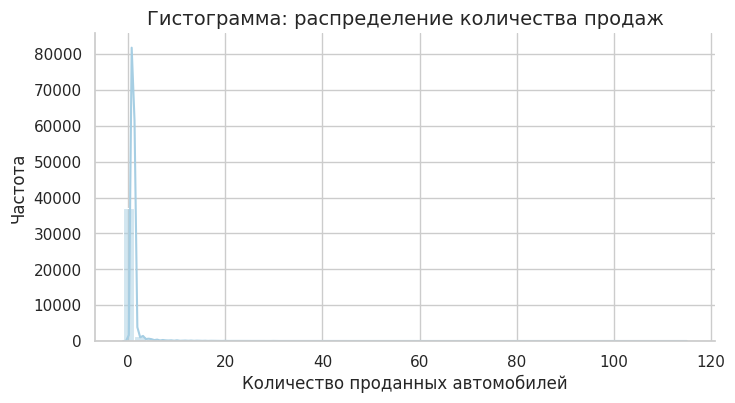

In [220]:
plt.figure(figsize=(8, 4))
sns.histplot(df['quantity'], bins=50, kde=True)
plt.xlabel('Количество проданных автомобилей')
plt.ylabel('Частота')
plt.title('Гистограмма: распределение количества продаж')
plt.show()

 - На гистограмме видно, что в основном продажи по одному автомобилю, но так же есть и крупные продажи более 100 автомобилей. Это возможно для коммерческих продаж. Оценим достоверность этих данных при анализе цен и суммы продажи.
 - Так же встречается отрицательное значение -1. Похоже это возврат, проверим эту строку отдельно, если догадка подтвердится то удалим эту строку.

In [221]:
df[df['quantity'] == -1]

,year,month,company,brand,model,modification,production_year,country_of_origin,fuel_type,engine_volume_liters,transmission_type,drive_type,region,quantity,price_usd,sales_usd,oblast,segmentation_2013,class_2013,production_localization
25728,2019,Август,bipek auto,Skoda,Superb,NaN,2019,KAZ,F,2,A,4WD,Тараз,-1,"35,588","-35,588",Жамбылская область,Легковые автомобили,D класс,Локальное производство


In [222]:
df.drop(df[df['quantity'] == -1].index, inplace=True)

Строка с возвратом удалена.

Исследовательский анализ данных в столбце 'price_usd'.

In [223]:
df['price_usd'].describe()

,price_usd
count,"39,919"
mean,"28,267"
std,"20,010"
min,"7,100"
25%,"15,528"
50%,"24,285"
75%,"32,506"
max,"328,511"


По описательной статистике в целом можно оценить наличие явных выбросов: отрицательных значений нет, есть довольно дорогостоящие автомобили.

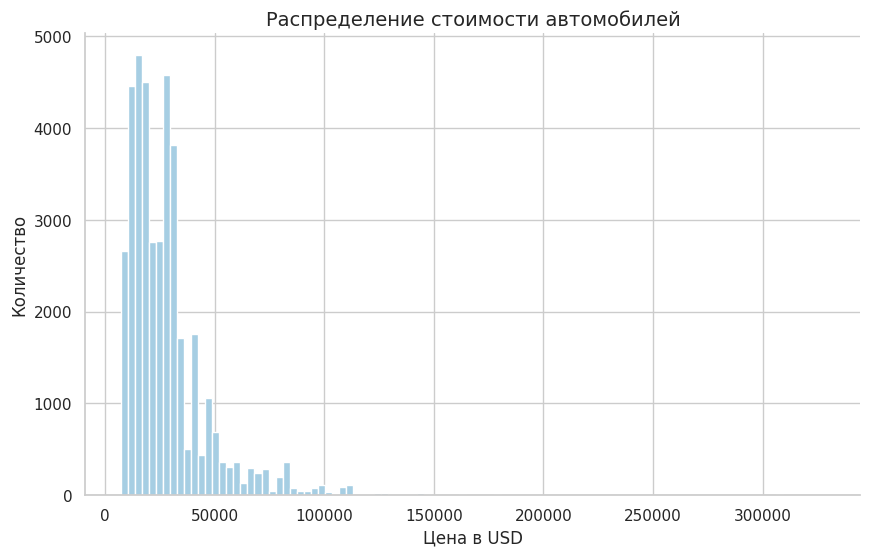

In [224]:
plt.figure(figsize=(10, 6))
df['price_usd'].hist(bins=100)
plt.title('Распределение стоимости автомобилей')
plt.xlabel('Цена в USD')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

- Распределение асимметрично, с длинным правым хвостом.
- Проверим данные на явные аномалии: посмотрим марки и брэнды автомобилей, которые стоят более 150 000 $

In [225]:
df[df['price_usd'] > 150000][['brand', 'model']].value_counts().sort_values(ascending=False)

,,count
brand,model,
Land Rover,Range Rover,30
Mercedes-Benz,G-Class,18
ANKAI,HFF6124G03EV3,10
Hyundai Truck & Bus,Universe,7
Mercedes-Benz Trucks,Tourismo,2
Porsche,Panamera,2
BMW,i8,1
Mercedes-Benz Trucks,Setra,1
Porsche,911 Carrera S,1


Все это модели премиум-класса и спец-техника. Поэтому высокая стоимость свыше 150 тыс. долларов оправдана и аномалией не считается.

In [226]:
df['sales_usd'].describe()

,sales_usd
count,"39,919"
mean,"33,785"
std,"50,725"
min,"7,100"
25%,"16,646"
50%,"26,249"
75%,"35,015"
max,"3,778,206"


**Итоговая стоимость продажи (sales_usd)**

- Мин. значение: 7100 дол.
- Макс. значение: 3778206 дол.
- Медиана: 26250 дол.
- 75% значений не превышают 35000 дол.
- Распределение с большим разбросом: возможны высокие значения из-за крупных продаж (много авто или дорогих моделей)  
- Отрицательных значений нет — явных ошибок не обнаружено  
- Высокие значения стоит дополнительно проверить на состав сделки (цена * количество)

**Проверка достоверности стоимости продажи:** она должна быть примерно равна количеству умноженному на цену с учётом небольшого допустимого отклонения (на округления и пр.)  например ±1%.

In [227]:
# Подсчёт количества строк с отклонением > 1%
num_mismatches = (
    (abs((df['quantity'] * df['price_usd'] - df['sales_usd']) / df['sales_usd']) > 0.01)
    .sum()
)

print(f'Количество строк с отклонением > 1%: {num_mismatches}')

Количество строк с отклонением > 1%: 0


Расчёты показали, что ни одна строка не содержит отклонений больше 1% между расчетной и фактической стоимостью продажи. Это подтверждает корректность вычислений и отсутствие выбросов или ошибок в этих ключевых показателях. Следовательно, данные по продажам (sales_usd) достоверны и могут использоваться для дальнейшего анализа без дополнительной очистки.

#### Посмотрим распределение стоимости продаж автомобилей `sales_usd`.

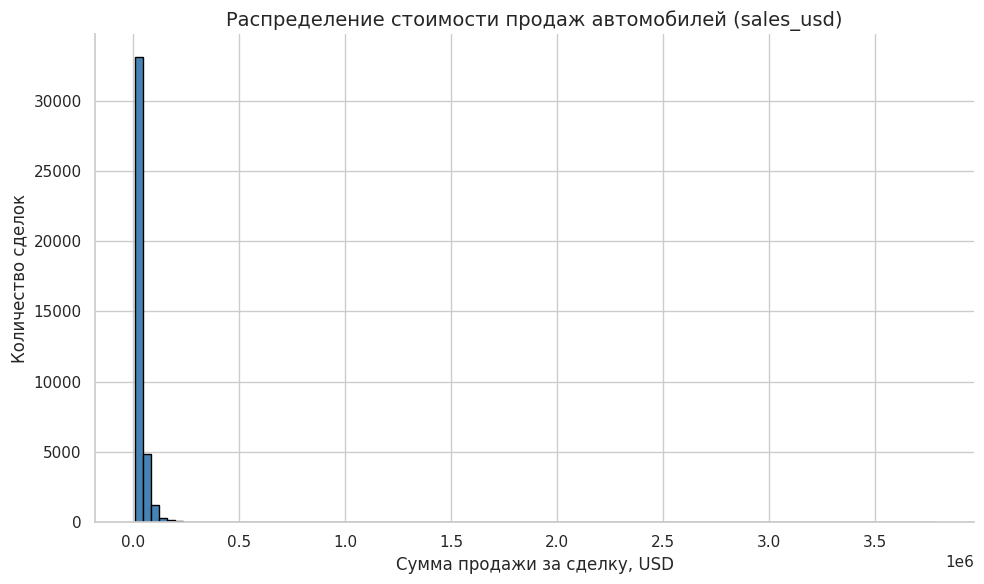

In [228]:
plt.figure(figsize=(10, 6))
df['sales_usd'].hist(bins=100, color='steelblue', edgecolor='black')
plt.title('Распределение стоимости продаж автомобилей (sales_usd)')
plt.xlabel('Сумма продажи за сделку, USD')
plt.ylabel('Количество сделок')
plt.grid(True)
plt.tight_layout()
plt.show()

Гистограмма показывает, что большинство продаж автомобилей сосредоточено в ценовом диапазоне до 40 тыс. долларов. При этом встречаются редкие, но очень крупные сделки, создающие длинный правый хвост распределения. Эти выбросы не влияют на общую тенденцию рынка. Посмотрим более точечно распределение до 100 тыс. долларов.


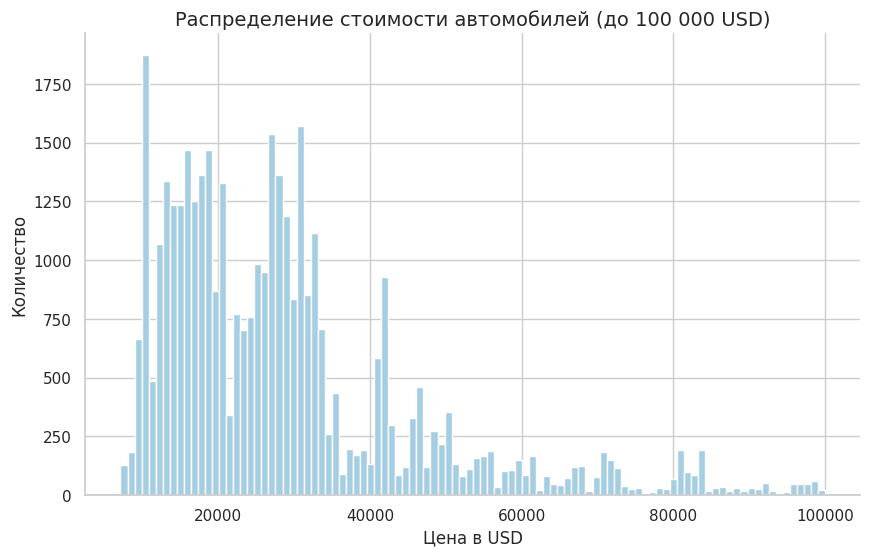

In [229]:
plt.figure(figsize=(10, 6))
df.loc[df['sales_usd'] <= 100000, 'sales_usd'].hist(bins=100)
plt.title('Распределение стоимости автомобилей (до 100 000 USD)')
plt.xlabel('Цена в USD')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Распределение выглядит скошенным вправо: большинство продаж сосредоточено в диапозоне от 15 тыс. до 35 тыс. долларов, а высокие цены встречаются реже. Это подтверждает, что рынок в основном состоит из автомобилей средней ценовой категории, а очень дорогие продажи — редкость и составляют «правый хвост» на полной гистограмме.

## Заполнение пропусков.

Посмотрим наличие пропусков по всем столбцам после удаления всех неявных дубликатов.

In [230]:
df.isna().sum()

,0
year,0
month,0
company,0
brand,0
model,0
modification,3584
production_year,501
country_of_origin,0
fuel_type,3140
engine_volume_liters,4276


- Наибольшее количество пропусков сосредоточено в **технических характеристиках автомобиля:**
  - `drive_type` — 4476 пропусков  
  - `engine_volume_liters` — 4276  
  - `transmission_type` — 3283  
  - `fuel_type` — 3140
- **Информация о годе выпуска:** `production_year` — 501 пропус. Возможна проверка и восстановление по модели.  
- **Данные по продажам, регионам, производителям, сегментации — заполнены полностью.**

#### Заполнение пропусков по техническим характеристикам.

Посмотрим какие модели/бренды чаще всего встречаются с пропусками в технических характеристиках, и приоритетно заполним именно их — это сэкономит время и даст наибольший эффект.

In [231]:
# Подсчёт строк с пропусками в хотя бы одной тех. характеристике
missing_rows = df[[
    'fuel_type',
    'engine_volume_liters',
    'transmission_type',
    'drive_type',
    'production_year'
]].isnull().any(axis=1).sum()

# Подсчёт уникальных моделей с такими пропусками
missing_models = df[
    df[[
        'fuel_type',
        'engine_volume_liters',
        'transmission_type',
        'drive_type',
        'production_year'
    ]].isnull().any(axis=1)
]['model'].nunique()

print(f"Строк с пропусками хотя бы в одной тех. характеристике: {missing_rows:,}")
print(f"Уникальных моделей с такими пропусками: {missing_models}")

Строк с пропусками хотя бы в одной тех. характеристике: 5,157
Уникальных моделей с такими пропусками: 128


#### Шаг 1: Частичное заполнение пропусков на основе модификаций

На этом шаге мы:

- Группируем данные по столбцу `modification`.
- Для каждой модификации ищем уникальные заполненные значения в технических характеристиках.
- Если для характеристики есть хотя бы одно уникальное значение, сохраняем его в словарь.
- Используем этот словарь для заполнения пропущенных значений в исходном датафрейме по соответствующим модификациям.
- При этом не перезаписываем уже существующие значения, а только дополняем пропуски.

Так мы максимально корректно восстанавливаем недостающие данные, используя имеющуюся информацию о модификациях.

In [232]:
# Список нужных столбцов
tech_columns = [
    'fuel_type',
    'engine_volume_liters',
    'transmission_type',
    'drive_type',
    'production_year'
]

# Группируем по модификации и берём уникальные значения (дропаем NaN)
mod_specs_partial = {}

for mod, group in df.groupby('modification'):
    specs = {}
    for col in tech_columns:
        unique_vals = group[col].dropna().unique()
        if len(unique_vals) == 1:
            specs[col] = unique_vals[0]
    if specs:
        mod_specs_partial[mod] = specs

# Создаем копию датафрейма и колонку-флаг
df['filled_by_mod_specs'] = False

for mod, specs in mod_specs_partial.items():
    # Маска для строк с нужной модификацией
    mask = df['modification'] == mod
    updated = False  # Флаг: было ли что-то заполнено

    for col, value in specs.items():
        # Маска для пропусков в конкретном столбце
        missing_mask = mask & df[col].isna()

        # Если есть что заполнить — заполняем и помечаем
        if missing_mask.any():
            df.loc[missing_mask, col] = value
            updated = True

    # Если что-то заполнилось — ставим True в флаг
    if updated:
        df.loc[mask, 'filled_by_mod_specs'] = True

# Сколько строк было дополнено по словарю
df['filled_by_mod_specs'].value_counts()

,count
filled_by_mod_specs,
False,36425
True,3494


Заполнена значительная часть пропусков.

#### Шаг 2: Частичное заполнение пропусков по моделям, большая часть данных по которым заполнена.

Посмотрим теперь топ моделей количество пропусков по которым максимально. Так же количетсво строк с данными по этим моделям и общее количество.

In [233]:
(
    df.assign(
        has_na=df[
            ['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type', 'production_year']
        ].isnull().any(axis=1)
    )
    .pivot_table(
        index=['brand', 'model'],
        columns='has_na',
        aggfunc='size',
        fill_value=0
    )
    .reset_index()
    .rename(columns={False: 'filled_rows', True: 'missing_rows'})
    .assign(total=lambda x: x['filled_rows'] + x['missing_rows'])
    .sort_values('missing_rows', ascending=False)
    .head(10)
)

has_na,brand,model,filled_rows,missing_rows,total
214,Renault,Duster,102,573,675
219,Renault,Sandero,5,431,436
91,Jac,S3,959,327,1286
217,Renault,Logan,0,320,320
120,KAMAZ,65115,0,259,259
210,Ravon,Nexia R3,1465,234,1699
215,Renault,Kaptur,0,230,230
106,KAMAZ,43118,0,188,188
50,GAZ,3302,871,127,998
257,Volkswagen,Polo,419,125,544


По моделям 'S3', 'Nexia R3', '3302', 'Polo' заполненых строк больше чем не заполненных. Обработаем их в первую очередь.

#### Jac S3

In [234]:
(
    df[(df['brand'] == 'Jac') & (df['model'] == 'S3')]
    [['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type', 'production_year']]
    .value_counts()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

,fuel_type,engine_volume_liters,transmission_type,drive_type,production_year,count
0,F,2,A,FWD,2019,682
1,F,2,A,FWD,2018,138
2,F,2,M,FWD,2019,126
3,F,2,M,FWD,2018,11
4,F,2,M,FWD,2018,1
5,F,2,A,FWD,2017,1


**Вывод по данным Jac S3**
Для заполнения пропусков у Jac S3 можно с высокой уверенностью ставить:
 - fuel_type = бензин (F),
 - engine_volume_liters = 1.6 Основная масса автомобилей (больше 80%),
 - drive_type = FWD,
 - transmission_type — автоматическая коробка (Automatic) около 82% (682 + 138 из 959)

In [235]:
fill_values_s3 = {
    'fuel_type': 'F',
    'engine_volume_liters': 1.6,
    'transmission_type': 'A',
    'drive_type': 'FWD'
}

mask = (df['brand'] == 'Jac') & (df['model'] == 'S3')

for col, val in fill_values_s3.items():
    df.loc[mask & df[col].isnull(), col] = val

In [236]:
df[(df['brand'] == 'Jac') & (df['model'] == 'S3')][[
    'fuel_type',
    'engine_volume_liters',
    'transmission_type',
    'drive_type'
]].isnull().sum()

,0
fuel_type,0
engine_volume_liters,0
transmission_type,0
drive_type,0


#### Ravon Nexia R3

In [237]:
(
    df[(df['brand'] == 'Ravon') & (df['model'] == 'Nexia R3')]
    [['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type', 'production_year']]
    .value_counts()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

,fuel_type,engine_volume_liters,transmission_type,drive_type,production_year,count
0,F,2,A,FWD,2019,1029
1,F,2,M,FWD,2019,431
2,F,2,M,FWD,2018,4
3,F,2,A,FWD,2018,1


**Наиболее частая конфигурация** — бензин (F), объем 1.5 л, автомат (A), привод FWD, 2019 год.
Можно с высокой уверенностью заполнить пропуски у Ravon Nexia R3 этими значениями.

In [238]:
fill_values_nexia = {
    'fuel_type': 'F',
    'engine_volume_liters': 1.5,
    'transmission_type': 'A',
    'drive_type': 'FWD'
}

mask = (df['brand'] == 'Ravon') & (df['model'] == 'Nexia R3')
df.loc[mask, fill_values_nexia.keys()] = df.loc[mask, fill_values_nexia.keys()].fillna(value=fill_values_nexia)

# Проверка остались ли пропуски
df.loc[mask, [
    'fuel_type',
    'engine_volume_liters',
    'transmission_type',
    'drive_type'
]].isnull().sum()

,0
fuel_type,0
engine_volume_liters,0
transmission_type,0
drive_type,0


#### GAZ 3302

In [239]:
(
    df[(df['brand'] == 'GAZ') & (df['model'] == '3302')]
    [['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type', 'production_year']]
    .value_counts()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

,fuel_type,engine_volume_liters,transmission_type,drive_type,production_year,count
0,F,3,M,RWD,2019,613
1,F,3,M,RWD,2018,225
2,F,3,M,4WD,2019,13
3,F,3,M,RWD,2017,8
4,F,3,M,4WD,2018,6
5,F,3,M,RWD,2019,3
6,D,4,M,RWD,2019,1
7,F,3,M,RWD,2016,1
8,F,4,M,RWD,2019,1


**Наиболее частая конфигурация** — бензин (F), объем 2.7 л, коробка (M), привод RWD
Можно с высокой уверенностью заполнить пропуски у GAZ	3302 этими значениями.

In [240]:
fill_values_gaz_3302 = {
    'fuel_type': 'F',
    'engine_volume_liters': 2.7,
    'transmission_type': 'M',
    'drive_type': 'RWD'
}

mask = (df['brand'] == 'GAZ') & (df['model'] == '3302')
df.loc[mask, fill_values_gaz_3302.keys()] = df.loc[mask, fill_values_gaz_3302.keys()].fillna(value=fill_values_gaz_3302)

# Проверим, остались ли пропуски
df.loc[mask, ['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type']].isnull().sum()

,0
fuel_type,0
engine_volume_liters,0
transmission_type,0
drive_type,0


#### Volkswagen	Polo

In [241]:
(
    df[(df['brand'] == 'Volkswagen') & (df['model'] == 'Polo')]
    [['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type', 'production_year']]
    .value_counts()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head()
)

,fuel_type,engine_volume_liters,transmission_type,drive_type,production_year,count
0,F,2,A,FWD,2018,249
1,F,2,M,FWD,2018,78
2,F,2,A,FWD,2019,77
3,F,2,M,FWD,2019,11
4,F,2,A,4WD,2018,3


**Наиболее частая конфигурация Volkswagen Polo** — бензин (F), объем 1.6 л, привод FWD.

С высокой уверенностью можно заполнить пропуски у Volkswagen Polo этими значениями.

In [242]:
fill_values_polo = {
    'fuel_type': 'F',
    'engine_volume_liters': 1.6,
    'drive_type': 'FWD'
}

mask = (df['brand'] == 'Volkswagen') & (df['model'] == 'Polo')

df.loc[mask, fill_values_polo.keys()] = df.loc[mask, fill_values_polo.keys()].fillna(value=fill_values_polo)
# Проверим, остались ли пропуски
df.loc[mask, ['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type']].isnull().sum()

,0
fuel_type,0
engine_volume_liters,0
transmission_type,27
drive_type,0


Заполним оставшиеся пропуски: найдем чаще всего встречающиеся технические характеристики автомобилей.

In [243]:
(
    df.assign(
        has_na=df[
            ['fuel_type', 'engine_volume_liters', 'transmission_type', 'drive_type']
        ].isnull().any(axis=1)
    )
    .pivot_table(
        index=['brand', 'model'],
        columns='has_na',
        aggfunc='size',
        fill_value=0
    )
    .reset_index()
    .rename(columns={False: 'filled_rows', True: 'missing_rows'})
    .assign(total=lambda x: x['filled_rows'] + x['missing_rows'])
    .sort_values('missing_rows', ascending=False)
    .head(6)
)

has_na,brand,model,filled_rows,missing_rows,total
214,Renault,Duster,102,573,675
219,Renault,Sandero,5,431,436
217,Renault,Logan,0,320,320
120,KAMAZ,65115,0,259,259
215,Renault,Kaptur,0,230,230
106,KAMAZ,43118,0,188,188


#### Renault

In [244]:
# Справочник с типовыми характеристиками по моделям Renault
fill_values_renault = {
    'Duster': {
        'fuel_type': 'F',
        'engine_volume_liters': 2.0,
        'transmission_type': 'A',
        'drive_type': '4WD'
    },
    'Sandero': {
        'fuel_type': 'F',
        'engine_volume_liters': 1.6,
        'transmission_type': 'M',
        'drive_type': 'FWD'
    },
    'Logan': {
        'fuel_type': 'F',
        'engine_volume_liters': 1.6,
        'transmission_type': 'M',
        'drive_type': 'FWD'
    },
    'Kaptur': {
        'fuel_type': 'F',
        'engine_volume_liters': 2.0,
        'transmission_type': 'A',
        'drive_type': '4WD'
    }
}

# Проходим по каждой модели и заполняем пропуски по нужным полям
for model_name, values in fill_values_renault.items():
    mask = (df['brand'] == 'Renault') & (df['model'] == model_name)
    df.loc[mask, values.keys()] = df.loc[mask, values.keys()].fillna(value=values)

In [245]:
(
    df[df['brand'] == 'Renault']
    .groupby([
        'model',
        'fuel_type',
        'engine_volume_liters',
        'transmission_type',
        'drive_type'
    ], observed=True)
    .size()
    .reset_index(name='count')
    .query("count > 0")
    .sort_values('count', ascending=False)
    .drop_duplicates('model')
)

,model,fuel_type,engine_volume_liters,transmission_type,drive_type,count
2,Duster,F,2,A,4WD,619
6,Sandero,F,2,M,FWD,436
5,Logan,F,2,M,FWD,320
4,Kaptur,F,2,A,4WD,230


Пропуски заполнены корректно.

#### KAMAZ 65115 и 43118

In [246]:
df[
    (df['brand'] == 'KAMAZ') &
    (df['model'].isin(['65115', '43118']))
].drop_duplicates(subset='modification')

,year,month,company,brand,model,modification,production_year,country_of_origin,fuel_type,engine_volume_liters,transmission_type,drive_type,region,quantity,price_usd,sales_usd,oblast,segmentation_2013,class_2013,production_localization,filled_by_mod_specs
15050,2019,Январь,tk kamaz,KAMAZ,43118,43118,2018,KAZ,D,NaN,M,NaN,Нур-Султан,1,"49,950","49,950",г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,Локальное производство,False
15084,2019,Март,tk kamaz,KAMAZ,43118,43118 с КМУ Palfinger,2018,RUS,D,NaN,M,NaN,Актобе,1,"51,011","51,011",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,Импорт,False
15089,2019,Апрель,tk kamaz,KAMAZ,43118,KAMAZ 43118,2018,KAZ,D,NaN,M,NaN,Актау,1,"49,796","49,796",Мангистауская область,Коммерческие автомобили,Крупнотоннажные грузовики,Локальное производство,False
15495,2019,Январь,tk kamaz,KAMAZ,65115,65115,2017,KAZ,D,NaN,M,NaN,Актау,1,"43,150","43,150",Мангистауская область,Коммерческие автомобили,Крупнотоннажные грузовики,Локальное производство,False
15555,2019,Апрель,tk kamaz,KAMAZ,65115,KAMAZ 65115,2019,KAZ,D,NaN,M,NaN,Нур-Султан,1,"43,017","43,017",г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,Локальное производство,False


In [247]:
# # Справочник с типовыми характеристиками по моделям KAMAZ 43118 и 65115
fill_values_kamaz = {
    '43118': {
        'fuel_type': 'D',
        'engine_volume_liters': 10.85,
        'transmission_type': 'M',
        'drive_type': '4WD'
    },
    '65115': {
        'fuel_type': 'D',
        'engine_volume_liters': 6.7,
        'transmission_type': 'M',
        'drive_type': 'RWD'  # 6x4 трактуется как задний привод
    }
}

# Проходим по каждой модели и заполняем пропуски по нужным полям
for model_name, values in fill_values_kamaz.items():
    mask = (df['brand'] == 'KAMAZ') & (df['model'] == model_name)
    df.loc[mask, values.keys()] = df.loc[mask, values.keys()].fillna(value=values)

In [248]:
(
    df[df['brand'] == 'KAMAZ']
    .groupby([
        'model',
        'fuel_type',
        'engine_volume_liters',
        'transmission_type',
        'drive_type'
    ], observed=True)
    .size()
    .reset_index(name='count')
    .query("count > 0")
    .sort_values('count', ascending=False)
    .drop_duplicates('model')
)

,model,fuel_type,engine_volume_liters,transmission_type,drive_type,count
1,65115,D,7,M,RWD,259
0,43118,D,11,M,4WD,188


Пропуски заполнены корректно.

Проверим сколько всего осталось пропусков после обогащения данных.

#### Оценим количество оставшихся пропусков после обработки.

In [249]:
# Подсчёт строк с пропусками в хотя бы одной тех. характеристике
missing_rows = df[[
    'fuel_type',
    'engine_volume_liters',
    'transmission_type',
    'drive_type',
    'production_year'
]].isnull().any(axis=1).sum()

# Подсчёт уникальных моделей с такими пропусками
missing_models = df[
    df[[
        'fuel_type',
        'engine_volume_liters',
        'transmission_type',
        'drive_type',
        'production_year'
    ]].isnull().any(axis=1)
]['model'].nunique()

print(f"Строк с пропусками хотя бы в одной тех. характеристике: {missing_rows:,}")
print(f"Уникальных моделей с такими пропусками: {missing_models}")

Строк с пропусками хотя бы в одной тех. характеристике: 1,882
Уникальных моделей с такими пропусками: 115


**Краткий итог обработки пропусков**

Из 5,157 строк с пропусками мы заполнили 3,275 — это 63.5%.
Теперь осталось 1,882 строк и 115 моделей с пропущенными характеристиками.

## Добавление столбца дата продажи.

#### Формирование единого столбца дата продажи из года и месяца (с установкой последнего дня месяца в качестве даты).

In [250]:
# Словарь соответствий названий месяцев и их номеров
months = {
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12
}

# Преобразуем название месяца в номер
df['month_num'] = df['month'].map(months)

# Формируем дату продажи — первый день месяца
df['sale_date'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month_num'].astype(str),
    format='%Y-%m'
) + pd.offsets.MonthBegin(0)
df['sale_date'].unique()

<DatetimeArray>
['2019-05-01 00:00:00', '2019-08-01 00:00:00', '2019-04-01 00:00:00',
 '2019-07-01 00:00:00', '2019-02-01 00:00:00', '2019-06-01 00:00:00',
 '2019-09-01 00:00:00', '2019-01-01 00:00:00', '2019-03-01 00:00:00']
Length: 9, dtype: datetime64[ns]

В нашем датасэте представленны данные за 9 месяцев 2019 года с января по сентябрь.

#### Добавим столбец продажи в тыс. долларов `sales_kusd`.

Для удобства дальнейших расчетов и визуализаций, особенно при отображении больших денежных сумм, пересчет продаж в тысячи долларов упрощает восприятие и форматирование данных.

In [251]:
df['sales_kusd'] = df['sales_usd']/1000

#### Добавим столбец `full_model_name`

Добавляем столбец `full_model_name` для удобства анализа и визуализации. Он объединяет бренд и модель в одно имя для однозначной идентификации.

In [252]:
# Создаём новый столбец "бренд + модель"
df['full_model_name'] = df['brand'] + ' ' + df['model']

#### Удалим лишние и вспомогательные столбцы.

Удалим лишние столбцы: `modification` - он использовался для заполнения пропусков в технических характеристиках, для дальнейшего анализа он избыточен; `month` и `year` - также избыточны, потому что мы добавили столбец с датой продажи; `filled_by_mod_specs` - вспомогательный столбец.

In [253]:
# Удаляем лишние столбцы
df.drop(columns=['modification', 'filled_by_mod_specs','month_num', 'month', 'year'], inplace=True)

# Перемещаем 'sale_date' в начало датафрейма
cols = ['sale_date'] + [col for col in df.columns if col != 'sale_date']
df = df[cols]

### Общая информация о датафрэйме после предобработки данных.

После всех этапов очистки и заполнения пропусков важно зафиксировать текущее состояние датафрейма: сколько осталось данных, какие признаки имеются, есть ли ещё пропуски и как выглядит таблица в финальном виде. Это поможет удостовериться, что данные готовы к анализу и визуализации.

In [254]:
# Общая информация о датафрейме: типы данных и непустые значения
print("▶️ Информация о столбцах и типах данных:")
df.info()

print("\n▶️ Пропущенные значения по столбцам:")
print(df.isna().sum().sort_values(ascending=False))

print("\n▶️ Размер датафрейма (строки, столбцы):")
print(df.shape)

print("\n▶️ Пример первых строк таблицы:")
display(df.head())

▶️ Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
Index: 39919 entries, 0 to 39965
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sale_date                39919 non-null  datetime64[ns]
 1   company                  39919 non-null  object        
 2   brand                    39919 non-null  object        
 3   model                    39919 non-null  object        
 4   production_year          39514 non-null  Int16         
 5   country_of_origin        39919 non-null  object        
 6   fuel_type                39206 non-null  category      
 7   engine_volume_liters     38569 non-null  float64       
 8   transmission_type        38969 non-null  category      
 9   drive_type               38847 non-null  category      
 10  region                   39919 non-null  object        
 11  quantity                 39919 non-null  float64       
 

,sale_date,company,brand,model,production_year,country_of_origin,fuel_type,engine_volume_liters,transmission_type,drive_type,region,quantity,price_usd,sales_usd,oblast,segmentation_2013,class_2013,production_localization,sales_kusd,full_model_name
0,2019-05-01,mercur auto,Audi,A3,2018,DEU,F,1,A,FWD,Алматы,1,"28,115","28,115",г.Алматы,Легковые автомобили,C класс,Импорт,28,Audi A3
1,2019-08-01,mercur auto,Audi,A3,2018,DEU,F,1,A,FWD,Алматы,1,"32,247","32,247",г.Алматы,Легковые автомобили,C класс,Импорт,32,Audi A3
2,2019-04-01,mercur auto,Audi,A4,2018,DEU,F,1,A,FWD,Алматы,1,"32,000","32,000",г.Алматы,Легковые автомобили,D класс,Импорт,32,Audi A4
3,2019-07-01,mercur auto,Audi,A4,2018,DEU,F,1,A,FWD,Алматы,1,"31,929","31,929",г.Алматы,Легковые автомобили,D класс,Импорт,32,Audi A4
4,2019-07-01,mercur auto,Audi,A4,2018,DEU,F,1,A,FWD,Алматы,1,"31,929","31,929",г.Алматы,Легковые автомобили,D класс,Импорт,32,Audi A4


После предобработки в датафрэйме осталось 20 столбцов и около 40 тыс. записей. Все столбцы с корректным типом данных. Количество пропусков по техническим характеристикам получилось значительно сократить, оставшиеся пропуски оставим без изменений, чтобы не терять важную информацию о продажах. Добавили новый столбей с датой продажи (последнее число месяца).

# Анализ рынка автомобилей Казахстана.

### Общая динамика рынка автомобилей (по месяцам).

На этом этапе мы проанализируем ежемесячные изменения общих объемов продаж и количества проданных автомобилей. Это позволит выявить ключевые тренды, такие как рост, спад или сезонность рынка в целом. Так же это позволит сделать прогноз на 4й квартал, для оценки рынка в целом за год.n

In [255]:
# Сводная таблица: емкость рынка по дате продажи
market_capacity = (
    df.groupby('sale_date')[['quantity', 'sales_kusd']]
    .sum()
    .reset_index()
    .rename(columns={
        'quantity': 'total_quantity',
        'sales_kusd': 'total_sales_kusd'
    })
)
market_capacity

,sale_date,total_quantity,total_sales_kusd
0,2019-01-01,"4,474","113,328"
1,2019-02-01,"4,493","110,347"
2,2019-03-01,"5,055","128,067"
3,2019-04-01,"5,868","146,100"
4,2019-05-01,"6,438","164,126"
5,2019-06-01,"6,459","162,764"
6,2019-07-01,"7,778","203,180"
7,2019-08-01,"6,626","158,222"
8,2019-09-01,"6,641","162,521"


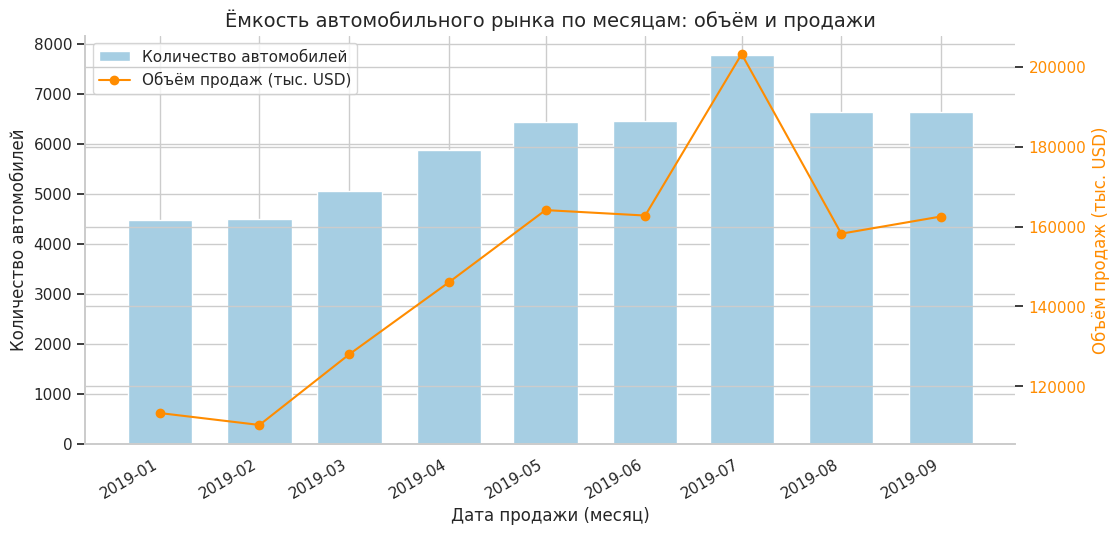

In [256]:
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 20  # ширина столбиков

# Столбцы — количество проданных автомобилей
ax1.bar(market_capacity['sale_date'], market_capacity['total_quantity'], label='Количество автомобилей', width=bar_width)
ax1.set_xlabel('Дата продажи (месяц)')
ax1.set_ylabel('Количество автомобилей')
ax1.tick_params(axis='y')

# Линия — сумма продаж

from matplotlib.ticker import ScalarFormatter

# Линия — сумма продаж в тысячах USD
ax2 = ax1.twinx()
ax2.plot(market_capacity['sale_date'],market_capacity['total_sales_kusd'],marker='o',label='Объём продаж (тыс. USD)',color='darkorange')
ax2.set_ylabel('Объём продаж (тыс. USD)', color='darkorange')
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax2.ticklabel_format(style='plain', axis='y')
ax2.tick_params(axis='y', labelcolor='darkorange')

fig.autofmt_xdate()
plt.title('Ёмкость автомобильного рынка по месяцам: объём и продажи')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

**Выводы:**

1. **Стабильный рост в первом полугодии:** Рынок демонстрирует последовательный рост как по количеству проданных автомобилей с 4,474 до 7,778 авто (+74%), так и по объему выручки с января по июль с ~113 тыс. до ~203 тыс. USD. Это указывает на позитивную тенденцию и, возможно, на начало активного сезона продаж, пик которого пришёлся на июль.

2. **Пик продаж в июле:** Июль 2019 года стал самым успешным месяцем как по количеству (7,778 авто), так и по выручке ($203.18 млн USD). Это может свидетельствовать о выраженной сезонности, когда середина лета является периодом повышенного спроса.

3. **Небольшое замедление/стабилизация в конце лета:** После июльского пика, в августе и сентябре наблюдается небольшое снижение объемов продаж по сравнению с июлем, но показатели всё ещё остаются на высоком уровне. Это может быть связано с естественным насыщением спроса после пикового месяца или началом подготовки к осеннему спаду.

4. **Февраль — самый слабый месяц по продажам:** Как в количестве, так и в объёме продаж — вероятно, связано с коротким месяцем и сезонностью (зимний спад).

### Емкость рынка автомобилей за 2019 год: в денежном и количественном выражении.

У нас есть данные только за 9 месяцев (январь–сентябрь) 2019 года, а оценка ёмкости рынка требуется за весь календарный год. Следовательно, 4 квартал (Q4) отсутствует, и его необходимо оценить с помощью прогноза.

Прогноз объёма продаж и количества автомобилей за 4 квартал можно рассчитать как 80% от среднего значения за предыдущие 3 квартала. В 4 квартале продажи обычно ниже пиковых летних месяцев, но и не должны опускаться до минимальных продаж в 1 квартале. Так же лучше недооценить, чем переоценить.

In [257]:
# Квартальная агрегация
market_quarterly = (
    market_capacity
    .assign(quarter=market_capacity['sale_date'].dt.to_period('Q'))
    .groupby('quarter')[['total_quantity', 'total_sales_kusd']]
    .sum()
    .reset_index()
)
# Прогноз на 4 квартал — 80% от среднего за Q1–Q3
forecast_q4 = pd.DataFrame({
    'quarter': [pd.Period('2019Q4', freq='Q')],
    'total_quantity': [market_quarterly.iloc[:3]['total_quantity'].mean() * 0.8],
    'total_sales_kusd': [market_quarterly.iloc[:3]['total_sales_kusd'].mean() * 0.8]
})

# Объединяем с реальными данными
market_quarterly = pd.concat([market_quarterly, forecast_q4], ignore_index=True)\
                     .sort_values('quarter')\
                     .reset_index(drop=True)
market_quarterly

,quarter,total_quantity,total_sales_kusd
0,2019Q1,"14,022","351,742"
1,2019Q2,"18,765","472,989"
2,2019Q3,"21,045","523,924"
3,2019Q4,"14,355","359,641"


In [258]:
print(
    f"Емкость рынка за 2019 год (оценка): "
    f"{market_quarterly['total_quantity'].sum() / 1_000:.1f} тыс. авто, "
    f"{market_quarterly['total_sales_kusd'].sum() / 1_000_000:.2f} млрд доларов"
)
print(f"Медианная стоимость автомобиля: {df['price_usd'].median():,.0f} долларов")

Емкость рынка за 2019 год (оценка): 68.2 тыс. авто, 1.71 млрд доларов
Медианная стоимость автомобиля: 24,285 долларов


**Выводы по ёмкости авторынка Казахстана в 2019 году:**

Рынок автомобилей в 2019 году можно отнести к среднему по объёму: объём продаж: 62.8 тыс. авто, финансовая ёмкость: ~$1.71 млрд долларов. Он характеризуется стабильным спросом, чёткой сезонной динамикой и средней ценовой категорией автомобилей (около 24 тыс. долларов). Эти данные создают надёжную основу для более глубокого анализа — по сегментам, регионам, брендам и моделям.

### Динамика рынка по сегментам `segmentation_2013`.

In [259]:
# Сводная таблица: сумма продаж по сегментам и месяцам
pivot_segment = df.pivot_table(
    index='segmentation_2013',
    columns=df['sale_date'].dt.to_period('M').astype(str),
    values='sales_kusd',
    aggfunc='sum',
    fill_value=0
)
pivot_segment

/tmp/ipython-input-4239821261.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_segment = df.pivot_table(


sale_date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
segmentation_2013,,,,,,,,,
Внедорожники,"58,515","61,832","58,112","79,620","78,252","84,312","88,978","77,332","76,646"
Коммерческие автомобили,"10,376","10,240","18,382","13,247","27,076","18,425","46,021","19,544","22,417"
Легковые автомобили,"40,417","32,907","45,747","46,326","51,004","52,709","63,341","55,353","59,740"
Минивэны,"1,768","2,017","2,961","3,272","2,888","2,910","2,255","2,934","1,760"
Пикапы,"2,253","3,351","2,865","3,636","4,904","4,409","2,585","3,060","1,959"


Построим тепловую карту по сегментам и диаграммы размаха в двух видах: в полном, со всеми выбросами и масштабированном с крупными боксплотами.

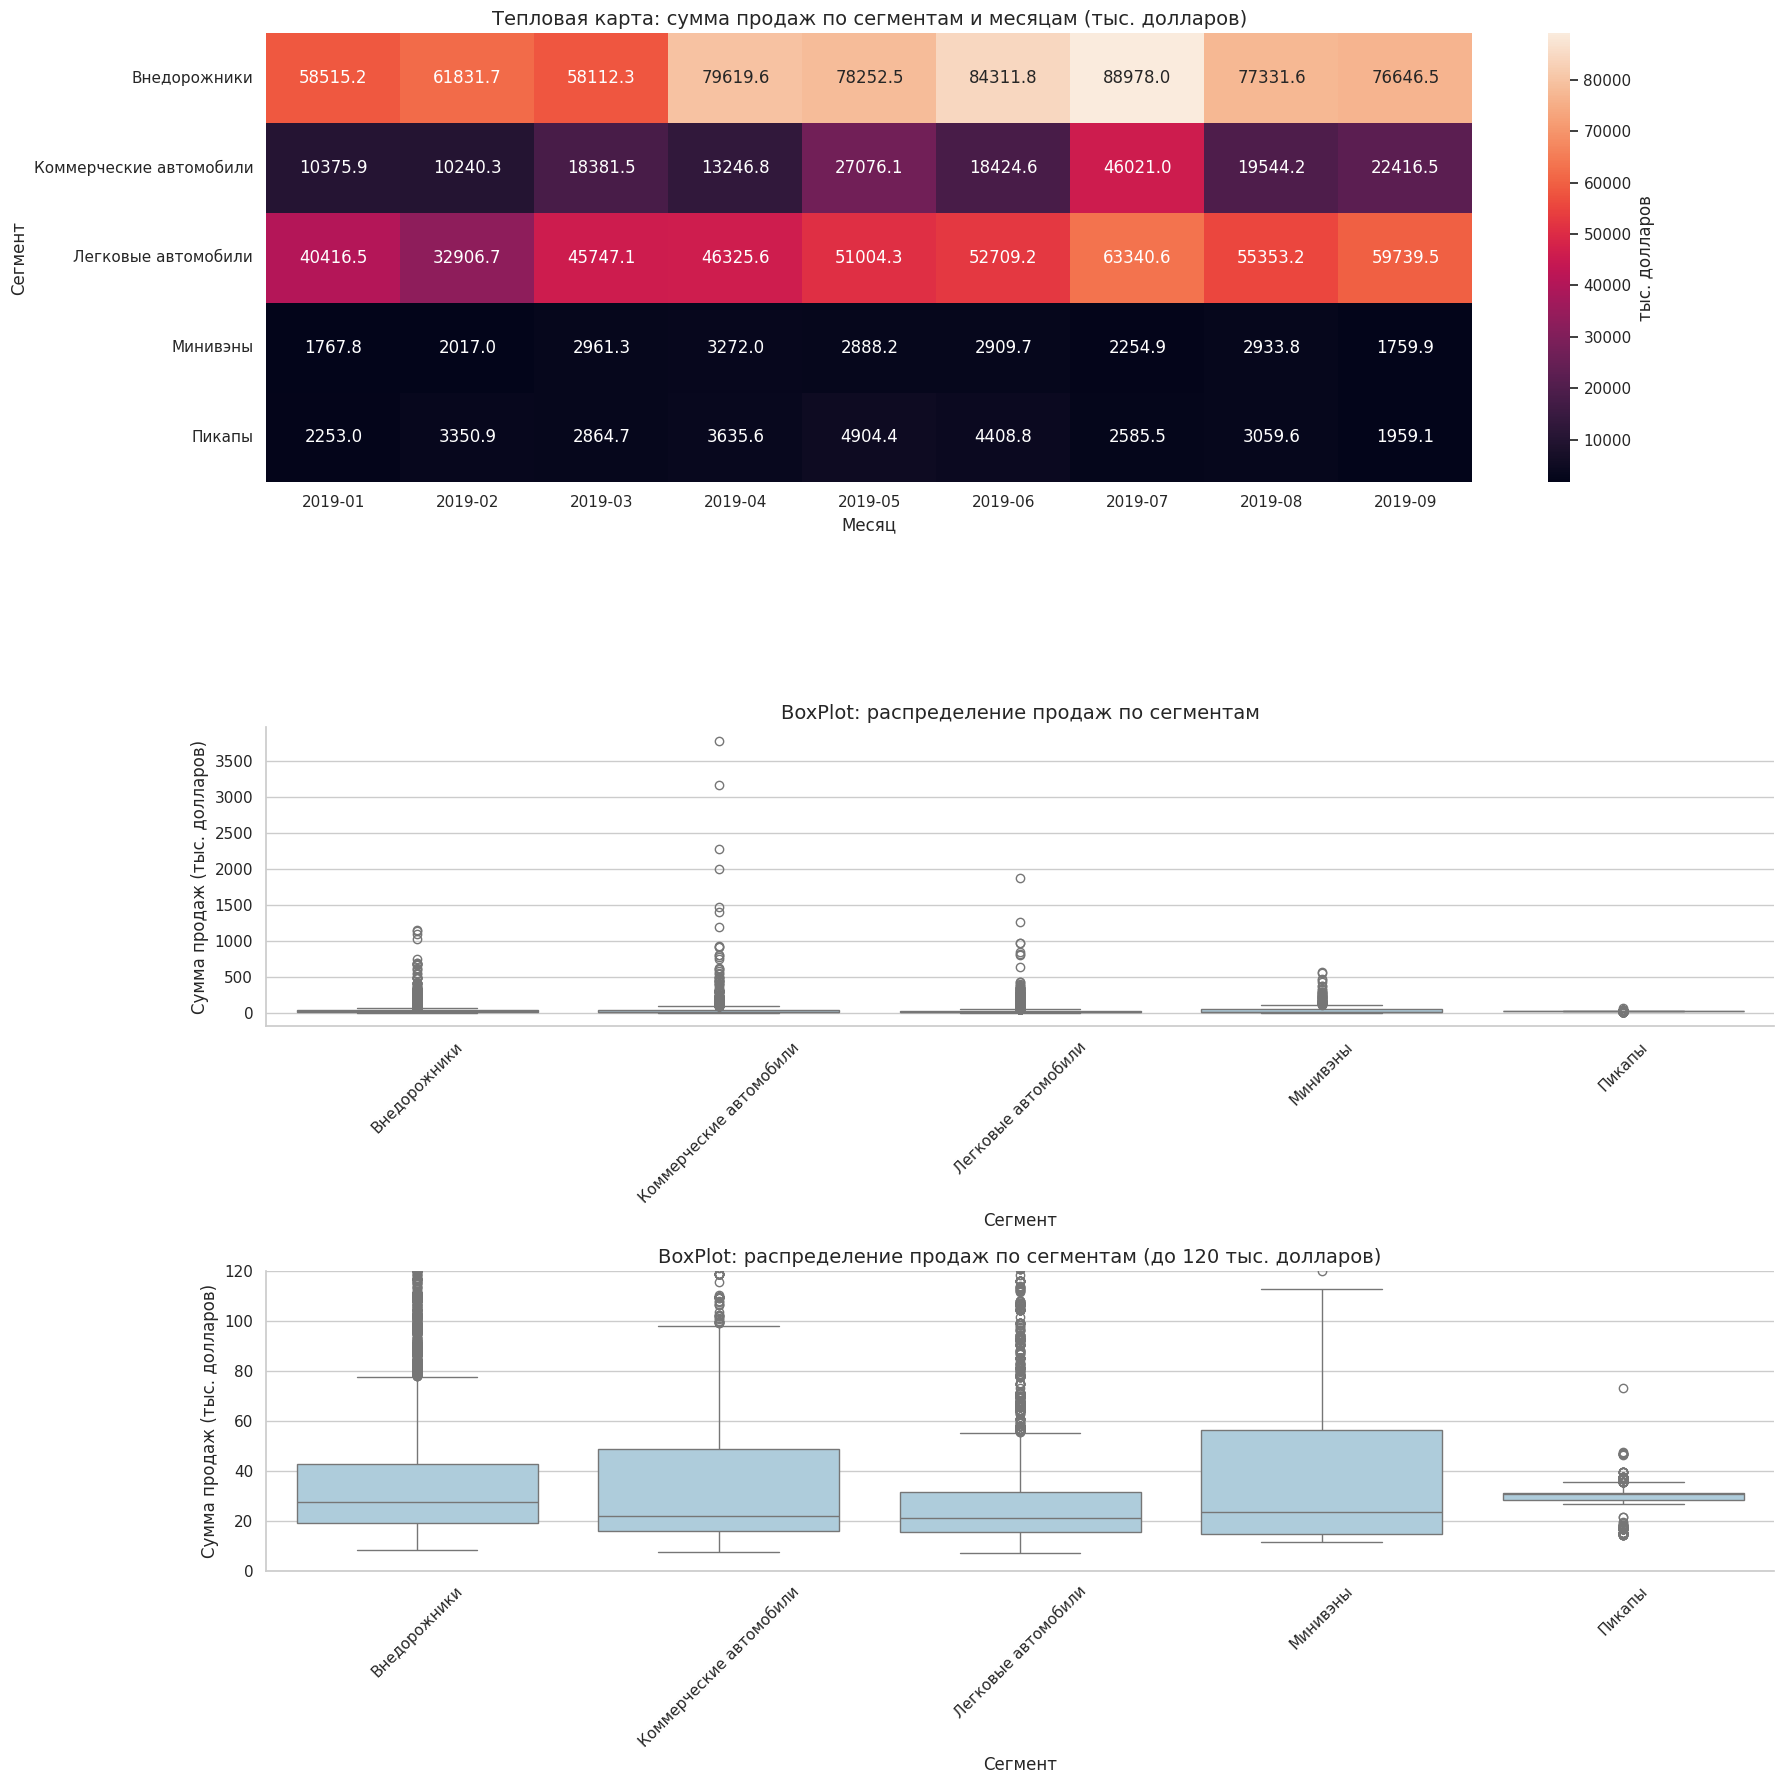

In [260]:
# Построение графиков
fig, axs = plt.subplots(3, 1, figsize=(18, 18), gridspec_kw={'height_ratios': [3, 2, 2]})
plt.subplots_adjust(hspace=0.5)

# 1. Тепловая карта
sns.heatmap(pivot_segment, annot=True, fmt=".1f", cbar_kws={'label': 'тыс. долларов'}, ax=axs[0])
axs[0].set_title('Тепловая карта: сумма продаж по сегментам и месяцам (тыс. долларов)')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Сегмент')

# 2. BoxPlot
sns.boxplot(data=df, x='segmentation_2013', y=df['sales_usd'] / 1_000, ax=axs[1])
axs[1].set_title('BoxPlot: распределение продаж по сегментам')
#axs[1].set_ylim(0, 200)
axs[1].set_xlabel('Сегмент')
axs[1].set_ylabel('Сумма продаж (тыс. долларов)')
axs[1].tick_params(axis='x', rotation=45)

# 3. BoxPlot (без выбросов)
sns.boxplot(data=df, x='segmentation_2013', y=df['sales_usd'] / 1_000, ax=axs[2])
axs[2].set_title('BoxPlot: распределение продаж по сегментам (до 120 тыс. долларов)', fontsize=14)
axs[2].set_ylim(0, 120)
axs[2].set_xlabel('Сегмент')
axs[2].set_ylabel('Сумма продаж (тыс. долларов)')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Тепловая карта — динамика продаж по сегментам и месяцам (млн долл.)**

 - Внедорожники — лидер по продажам каждый месяц. Пик — июль 2019 (89 млн долл.).
 - Легковые автомобили — второй по объёму сегмент, с ростом с марта по июль (до 63.3 млн долл.).
 - Коммерческие автомобили — неравномерные продажи, всплеск в июле (46 млн долл.).
 - Пикапы и минивэны — наименьшие объёмы. Продажи почти стабильны, меньше 5 млн долл. в месяц.

**BoxPlot — распределение продаж по сегментам** Показывает распределение месячных продаж для каждого сегмента, включая выбросы.

 - У внедорожников, коммерческих и легковых автомобилей много выбросов, в сторону высоких сумм продаж. Это могут быть оптовые закупки, дорогостоящая спец.техника или автомобили премиум класса. Такие аномально высокие значения могут искажать общую картину при анализе.
Поэтому для визуализации и оценки основной массы продаж целесообразно ограничить верхнюю границу по продажам до 120 млн долл.
 - Самые дорогие сегменты: Внедорожники и Пикапы имеют самую высокую "типичную" цену продажи.
 - Самые бюджетные сегменты: Коммерческие и Легковые автомобили.
 - Легковые автомобили имеют очень похожие цены для большинства продаж, что говорит о сильной конкуренции и стандартных предложениях в этом классе.
 - Наибольший ценовой разброс: Минивэны показывают наибольшее разнообразие цен внутри своего сегмента.

### Продажи по регионам `region`

После понимания общей емкости и динамики, логично будет детализировать ее по географии. Мы сгруппируем данные по столбцу `region` и посчитаем общую `sales_usd` и `quantity` для каждого региона, отберем топ 10 регионов по продажам. Это покажет, какие регионы являются крупнейшими рынками в стране.

In [261]:
# Группировка по регионам
region_sales = (
    df.groupby('region')[['sales_kusd', 'quantity']]
    .sum()
    .sort_values('sales_kusd', ascending=False)
    .head(10)
)
region_sales

,sales_kusd,quantity
region,,
Алматы,"426,425","13,943"
Нур-Султан,"292,565","10,149"
Костанай,"87,829","3,257"
Шымкент,"81,780","3,746"
Атырау,"74,577","3,391"
Караганда,"59,837","2,973"
Актау,"46,699","2,047"
Уральск,"45,793","2,177"
Актобе,"44,173","1,806"


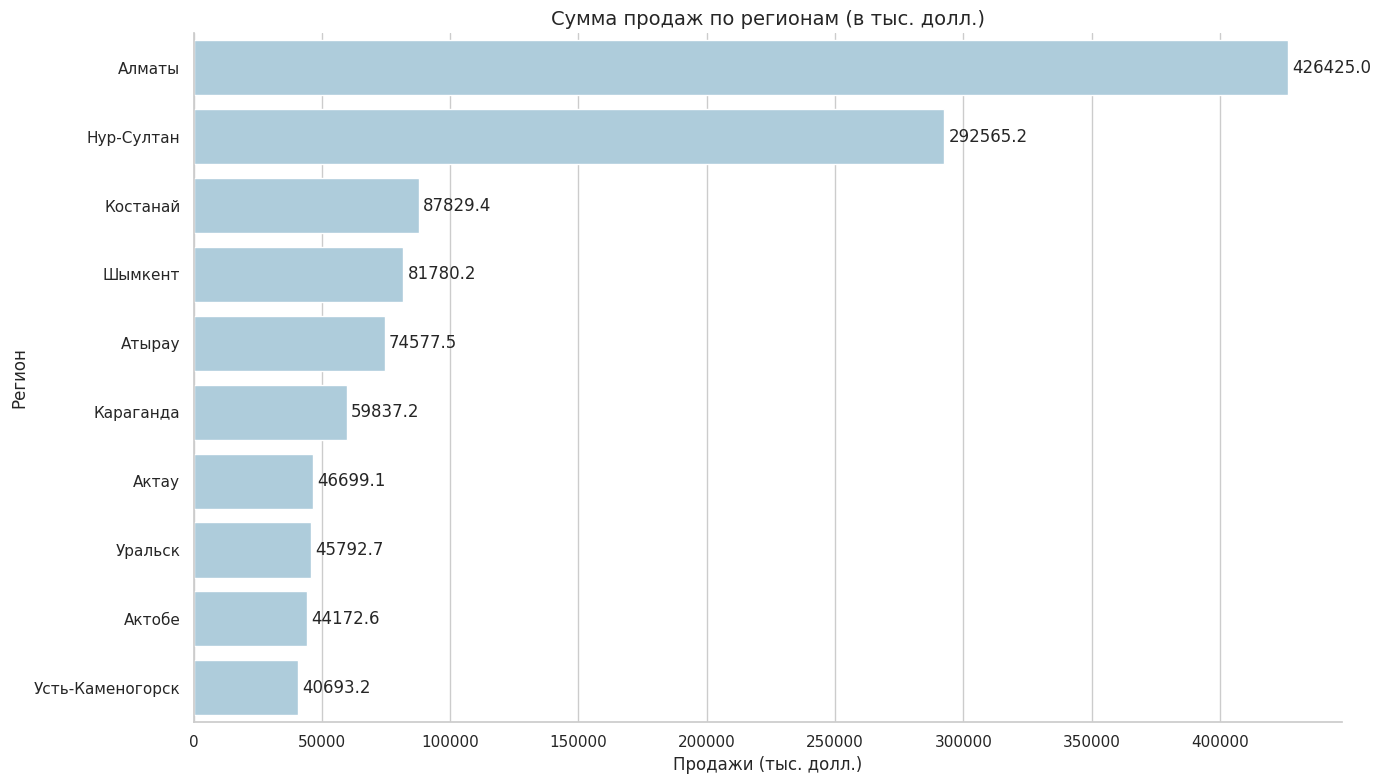

In [262]:
# Горизонтальный barplot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=region_sales.reset_index(),
    y='region',
    x='sales_kusd'
)

# Добавление подписей
ax.bar_label(ax.containers[0], fmt='%.1f', padding=3)

# Оформление
plt.title('Сумма продаж по регионам (в тыс. долл.)')
plt.xlabel('Продажи (тыс. долл.)')
plt.ylabel('Регион')
plt.tight_layout()
plt.show()

**Выводы по Продажам по Регионам**

- **Явные лидеры рынка:** **Алматы** и **Нур-Султан** являются доминирующими регионами по продажам. Алматы значительно опережает все остальные, продав почти 14 тысяч авто на 426 млн. долл, а Нур-Султан — более 10 тысяч авто на 293 млн. долл. Вместе они составляют основу рынка.
- **Регионы второго эшелона:** **Костанай, Шымкент, Атырау** формируют следующую группу, демонстрируя заметно меньшие, но все еще существенные объемы продаж (от 3 до 3.7 тысяч авто и от 75 млн до 88 млн. долл).
- **Менее активные рынки:** Остальные регионы (Караганда, Актау, Уральск, Актобе, Усть-Каменогорск) имеют значительно меньшие объемы продаж, находясь в диапазоне 1.8-3 тысячи авто и 40-60 млн. долл.
- **В целом:** Рынок автомобилей **крайне неравномерно распределен по регионам**, с ярко выраженными центрами активности в Алматы и Нур-Султане, которые являются основными драйверами продаж как по количеству, так и по денежному объему. Остальные регионы значительно отстают, и их вклад в общую емкость рынка существенно меньше.

### Продажи автоцентров `company`.

Углубляясь в географию и места продаж, мы рассмотрим автоцентры. Посмотрим то 12 автоцентров по объему продаж.

In [263]:
# Группировка по автоцентрам
company_sales = (
    df.groupby('company').agg(
        sales_kusd=('sales_kusd', 'sum'),
        quantity=('quantity', 'sum'),
        median_price_usd=('price_usd', 'median')
    )
    .sort_values('sales_kusd', ascending=False)
    .head(12)
    .reset_index()
)
company_sales

,company,sales_kusd,quantity,median_price_usd
0,toyota motor kazakhstan,"479,876","11,951","32,753"
1,astana motors,"229,339","10,169","20,558"
2,bipek auto,"185,933","15,126","12,950"
3,allur auto,"66,512","2,636","13,914"
4,nissan manufacturing rus,"46,289","1,760","24,824"
5,tk kamaz,"46,216",893,"49,340"
6,virazh,"46,125","2,909","15,684"
7,autocenter bavaria,"29,220",454,"48,996"
8,renault russia,"23,731","1,759","12,636"
9,mercur auto,"19,355",650,"15,138"


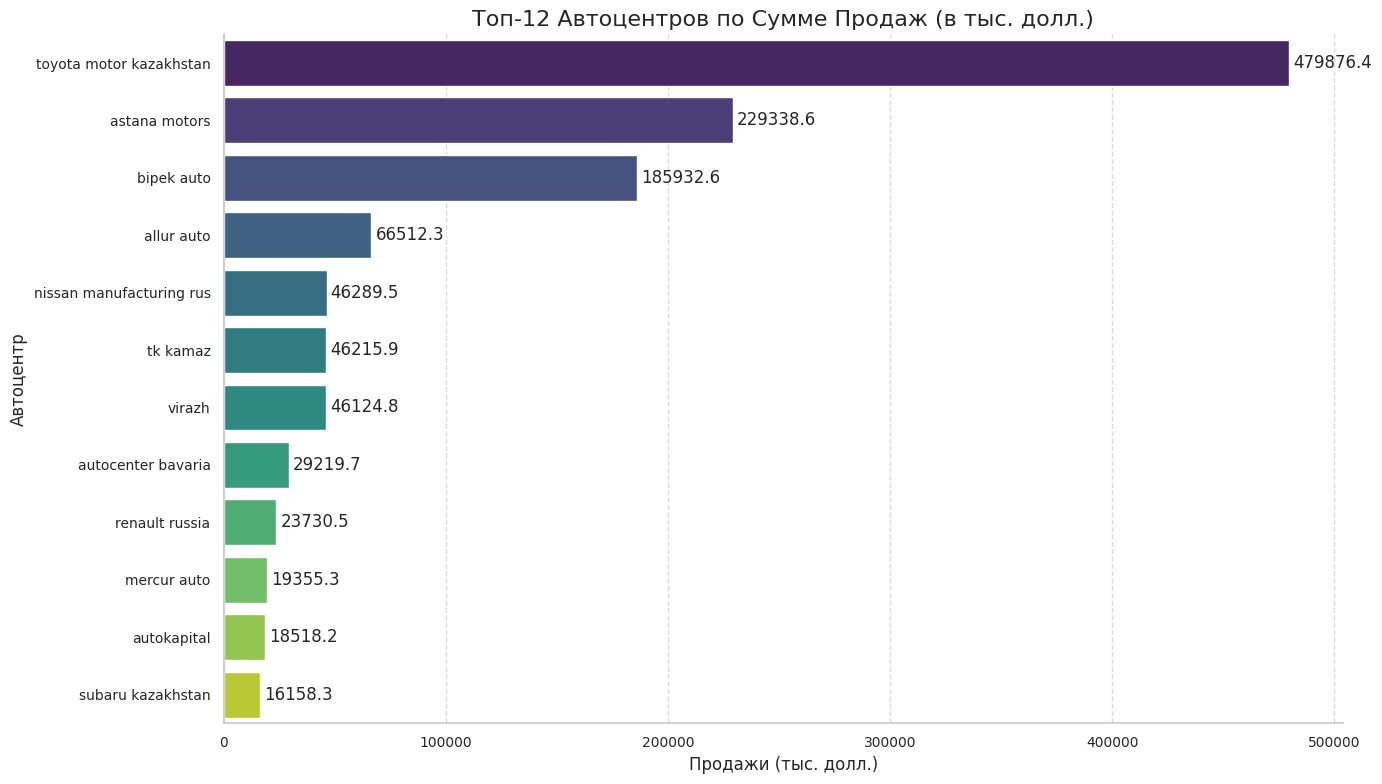

In [264]:
# Горизонтальный barplot для автоцентров
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=company_sales.reset_index(), # reset_index() для доступа к 'company' как к столбцу
    y='company',                      # Ось Y - автоцентры
    x='sales_kusd',                   # Ось X - продажи в тыс. долл.
    hue='company',                    # <<<<<<<<<<<< ИЗМЕНЕНИЕ ЗДЕСЬ: Назначаем 'company' в hue
    palette='viridis',                # Цветовая палитра
    legend=False                      # <<<<<<<<<<<< ИЗМЕНЕНИЕ ЗДЕСЬ: Отключаем легенду, так как цвета очевидны
)


# Добавление подписей к столбцам
# Форматируем подписи в "тыс. долл."
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

# Оформление графика
plt.title('Топ-12 Автоцентров по Сумме Продаж (в тыс. долл.)', fontsize=16)
plt.xlabel('Продажи (тыс. долл.)', fontsize=12)
plt.ylabel('Автоцентр', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Добавляем сетку по оси X
plt.tight_layout()
plt.show()

**Краткие выводы по Продажам Автоцентров (Топ-12)**
- **Явные лидеры:** Toyota Motor Kazakhstan доминирует (12 тыс. авто, 479.9 млн долл.), а Astana Motors следует за ними (10 тыс. авто, 229.3 млн долл.), формируя основу рынка.
- **Bipek Auto:** Продали больше всех авто (15 тыс.), но заработали меньше (186 млн долл.), указывая на фокус на массовый и бюджетный сегмент. Что подтверждается низкой средней ценой 11 тыс. долл.
- **Нишевые игроки:** Autocenter Bavaria (454 авто, 29.2 млн долл.) и TK Kamaz (893 авто, 46.2 млн долл) продают меньше, но с высокой средней ценой за единицу, вероятно, в премиум или спец. сегментах. Средняя цена авто 49 тыс. долл.
- **Средний эшелон:** Остальные компании, включая Allur Auto, Nissan, Virazh и Renault, показывают умеренные или низкие объемы продаж.
- **Mercur Auto:** Занимает скромную позицию в конце списка,  с 650 проданными авто и 19.4 млн долл. выручки, работая в среднем ценовом сегменте с относительно небольшим объемом. Среднняя цена за авто около 15 тыс. долл. По этим параметрам можно выделить прямых конкурентов( география, объем продаж и средняя цена за авто)

### Продажи автоцентров в разрезе `brand` / `segmentation_2013`.

In [265]:
top_brands_by_segment = (
    df.groupby(['segmentation_2013', 'brand'], observed=True)[['sales_usd', 'quantity']]
    .sum()
    .assign(
        sales_musd=lambda x: x['sales_usd'] / 1_000
    )
    .drop(columns=['sales_usd'])
    .reset_index()
    .sort_values(['segmentation_2013', 'sales_musd'], ascending=[True, False])
    .groupby('segmentation_2013', observed=True)
    .head(5)
    .reset_index(drop=True)
)

In [266]:
segment_brands_grouped = (
    df.copy()
    .groupby(['segmentation_2013', 'brand'], as_index=False, observed=True)['sales_kusd']
    .sum()
    .assign(
        rank=lambda x: x.groupby('segmentation_2013', observed=True)['sales_kusd'].rank(method='first', ascending=False)
    )
    .assign(
        brand_grouped=lambda x: x.apply(lambda row: row['brand'] if row['rank'] <= 5 else 'other', axis=1)
    )
    .drop(columns=['rank'])  # оставим только нужное
)

segment_brands = segment_brands_grouped.pivot_table(
    index='segmentation_2013',
    columns='brand_grouped',
    values='sales_kusd',
    aggfunc='sum',
    fill_value=0,
    observed=True
).sort_index()

# Поочерёдно выводим таблицы по каждому сегменту
for segment in segment_brands.index:
    print(f"\n📊 Сегмент: {segment}")
    display(
        segment_brands.loc[[segment]]
        .T  # транспонируем, чтобы бренды были строками
        .rename(columns={segment: 'sales_kusd'})
        .sort_values(by='sales_kusd', ascending=False)
        .head(6)
    )


📊 Сегмент: Внедорожники


segmentation_2013,sales_kusd
brand_grouped,
other,"195,840"
Toyota,"187,418"
Hyundai,"145,827"
Lexus,"68,565"
Nissan,"39,385"
Jac,"26,565"



📊 Сегмент: Коммерческие автомобили


segmentation_2013,sales_kusd
brand_grouped,
other,"55,115"
KAMAZ,"46,093"
GAZ,"32,286"
ANKAI,"28,907"
Daewoo,"12,163"
UAZ,"11,163"



📊 Сегмент: Легковые автомобили


segmentation_2013,sales_kusd
brand_grouped,
Toyota,"189,646"
Hyundai,"82,590"
other,"66,539"
Lada,"66,092"
Kia,"25,038"
Ravon,"17,638"



📊 Сегмент: Минивэны


segmentation_2013,sales_kusd
brand_grouped,
Lada,"19,417"
Volkswagen,"1,322"
Hyundai,891
Renault,505
Lifan,491
other,140



📊 Сегмент: Пикапы


segmentation_2013,sales_kusd
brand_grouped,
Toyota,"25,437"
Isuzu,"2,049"
UAZ,"1,088"
Volkswagen,447
Daewoo,0
ANKAI,0


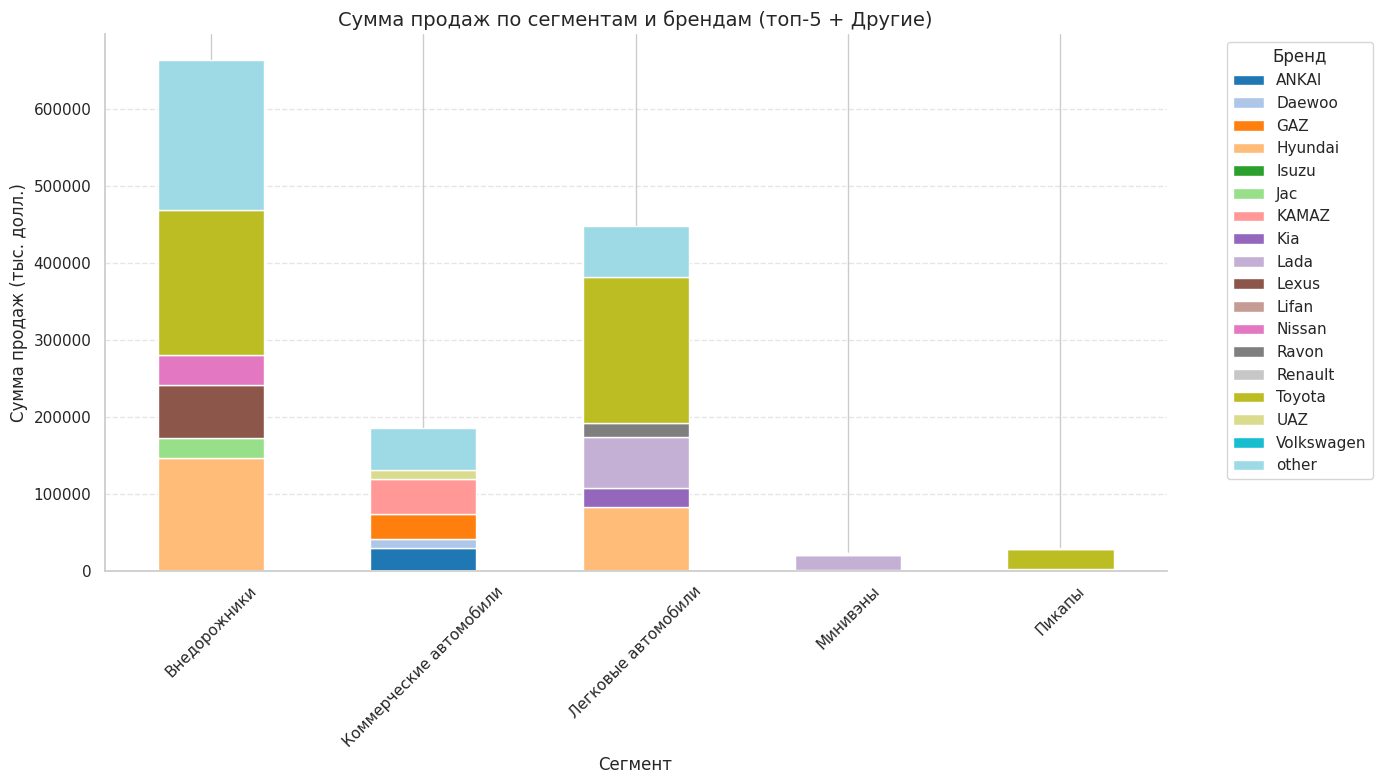

In [267]:
# Построение stacked bar chart
segment_brands = segment_brands[sorted(segment_brands.columns)]  # сортировка по бренду для красивого графика

ax = segment_brands.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'  # можно заменить на 'Set3', 'Paired' или другую палитру
)

plt.title('Сумма продаж по сегментам и брендам (топ-5 + Другие)', fontsize=14)
plt.ylabel('Сумма продаж (тыс. долл.)')
plt.xlabel('Сегмент')
plt.xticks(rotation=45)
plt.legend(title='Бренд', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Внедорожники**
 - Топ бренды: Toyota 187 млн долл, Hyundai 146 млн долл, Lexus 69 млн долл.
 - Сегмент крупнейший по объёму продаж и самый конкурентный, доля «других» брендов — 196 млн. долл.

**Легковые автомобили**
 - Топ брэнды: Lada 189 млн долл, Hyundai 83 млн долл, Kia 25 млн долл.
 - Lada — абсолютный лидер сегмента, остальная доля распределена между несколькими брендами и «другие» — 67 млн долл.

**Коммерческие автомобили**
 - KAMAZ 46 млн долл, GAZ 32 млн долл, ANKAI 29 млн долл, Daewoo 12 млн долл, UAZ 11 млн долл
 - Рынок фрагментирован, ведущие позиции занимают отечественные производители; «другие» — $55 млн долл.

**Минивэны**
 - Топ бренды: Lada — 19 млн дол, Volkswagen — 1.3 млн долл, Lifan — 0.5 млн долл
 - Сегмент мал по объёму, продажи сосредоточены у нескольких брендов; «другие» — 0.14 млн долл

**Пикапы**
 - Топ бренды: Toyota — 25 млн долл, Isuzu — 2 млн долл, UAZ — 1 млн долл, Volkswagen — 0.4 млн долл
 - Узкий сегмент с ярким лидером — Toyota; остальная часть рынка незначительна, «другие» — 0 долл

**Общие выводы**
 - Сегмент внедорожников — крупнейший и самый конкурентный по числу брендов и объёму продаж.
 - Toyota, Hyundai, Lada — самые сильные бренды на рынке в своих сегментах.
 - В ряде сегментов большая доля уходит в категорию «Другие», что говорит о высокой фрагментации и наличии нишевых игроков.
 - Сегменты минивэнов и пикапов занимают слабые позиции — скорее дополнение к основному ассортименту брендов.

### Бренды - лидеры на рынке.

Теперь перейдем к игрокам рынка. Мы сгруппируем данные по `brand` и вычислим суммарные `sales_kusd` и `quantity` для каждой марки. Это позволит определить долю каждой марки на рынке.

In [268]:
brand_summary = (
    df.pivot_table(
        index='brand',
        values=['sales_kusd', 'quantity'],
        aggfunc='sum',
        fill_value=0,
        observed=True
    )
    .sort_values('sales_kusd', ascending=False)
    .reset_index()
)

brand_summary.head(10)  # Топ-10 брендов по выручке

,brand,quantity,sales_kusd
0,Toyota,"10,745","402,500"
1,Hyundai,"10,168","229,308"
2,Lada,"11,092","107,847"
3,Lexus,"1,206","77,376"
4,KAMAZ,892,"46,093"
5,Kia,"2,358","45,670"
6,Nissan,"1,664","40,013"
7,GAZ,"1,821","32,286"
8,Jac,"2,099","30,589"
9,ANKAI,300,"28,907"


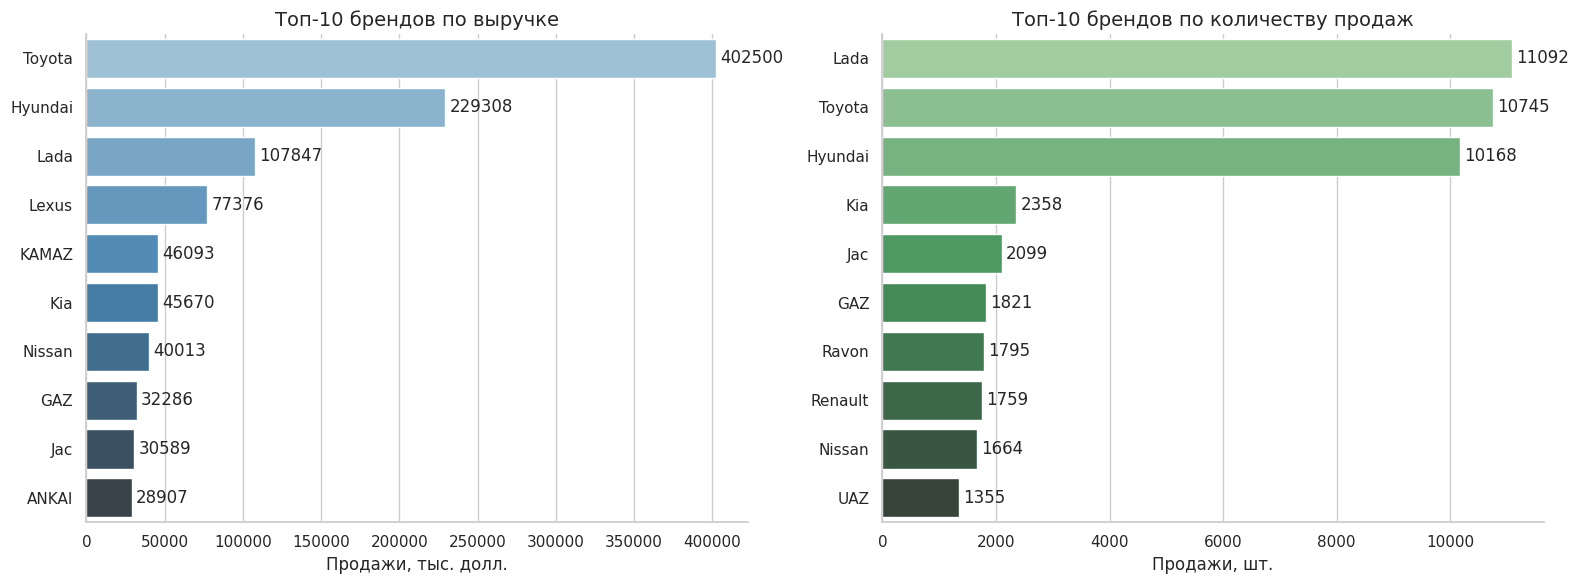

In [269]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Топ-10 брендов по выручке
sns.barplot(data=brand_summary.nlargest(10, 'sales_kusd'),
            x='sales_kusd',
            y='brand',
            hue='brand',
            palette='Blues_d',
            ax=axes[0])
axes[0].set_title('Топ-10 брендов по выручке')
axes[0].set_xlabel('Продажи, тыс. долл.')
axes[0].set_ylabel('')
add_labels(axes[0], fmt='{:.0f}')  # Добавляем подписи

# График 2: Топ-10 брендов по количеству продаж
sns.barplot(data=brand_summary.nlargest(10, 'quantity'),
            x='quantity',
            y='brand',
            hue='brand',
            palette='Greens_d',
            ax=axes[1])
axes[1].set_title('Топ-10 брендов по количеству продаж')
axes[1].set_xlabel('Продажи, шт.')
axes[1].set_ylabel('')
add_labels(axes[1], fmt='{:.0f}')  # Добавляем подписи

plt.tight_layout()
plt.show()

**Выводы по брендам**
 - Toyota — лидер по выручке (402,5 тыс. долл.) и один из лидеров по количеству продаж (10,745 шт.): сильная позиция на рынке.
 - Hyundai — второе место по выручке (229,3 тыс. долл.) и также высокая доля по количеству (10,168 шт.): стабильный крупный игрок.
 - Lada — первое место по количеству продаж (11,092 шт.), но с относительно низкой выручкой (107,8 тыс. долл.): массовый бюджетный сегмент.
 - Lada, Toyota и Hyundai по объёму продаж в разы опережают остальных: у них более 10 тыс. проданных автомобилей, тогда как у всех других брендов — не более 2,5 тыс. Это подчёркивает их доминирующее положение на рынке.
 - 	Lexus — мало продано (1,206 шт.), но высокая выручка (77,4 тыс. долл.): премиум-сегмент с высокой ценой за единицу.
 - KAMAZ, GAZ и ANKAI (автобусы) — низкие объёмы, но существенная выручка: коммерческий транспорт.
 - Kia, Nissan, Jac — средний сегмент, сбалансированная выручка и количество.

### Модели-лидеры на рынке `full_model_name`.

Теперь перейдем к топовым моделям на рынке. Мы сгруппируем данные по `model` и вычислим суммарные `sales_kusd` и `quantity` для каждой модели. Это позволит определить долю каждой модели на рынке.

In [270]:
model_summary = (
    df.pivot_table(
        index='full_model_name',
        values=['sales_kusd', 'quantity'],
        aggfunc='sum',
        fill_value=0,
        observed=True
    )
    .sort_values('sales_kusd', ascending=False)
    .reset_index()
)

model_summary.head(10)

,full_model_name,quantity,sales_kusd
0,Toyota Camry,"4,853","155,749"
1,Hyundai Tucson,"3,271","87,316"
2,Toyota LC Prado,"1,711","83,134"
3,Toyota LC200,779,"57,894"
4,Hyundai Elantra,"2,062","41,269"
5,Hyundai Accent,"2,211","36,482"
6,Hyundai Creta,"1,775","35,222"
7,Toyota Corolla,"1,089","33,897"
8,Toyota RAV4,"1,213","33,725"
9,Lexus LX,332,"33,641"


In [271]:
df.groupby(['brand', 'model']).agg({'sales_usd': 'sum', 'quantity': 'sum'}).reset_index().nlargest(10, 'sales_usd')

,brand,model,sales_usd,quantity
234,Toyota,Camry,"155,748,735","4,853"
62,Hyundai,Tucson,"87,315,649","3,271"
238,Toyota,LC Prado,"83,134,112","1,711"
239,Toyota,LC200,"57,893,776",779
58,Hyundai,Elantra,"41,269,146","2,062"
56,Hyundai,Accent,"36,481,914","2,211"
57,Hyundai,Creta,"35,222,267","1,775"
235,Toyota,Corolla,"33,896,785","1,089"
240,Toyota,RAV4,"33,725,128","1,213"
153,Lexus,LX,"33,640,569",332


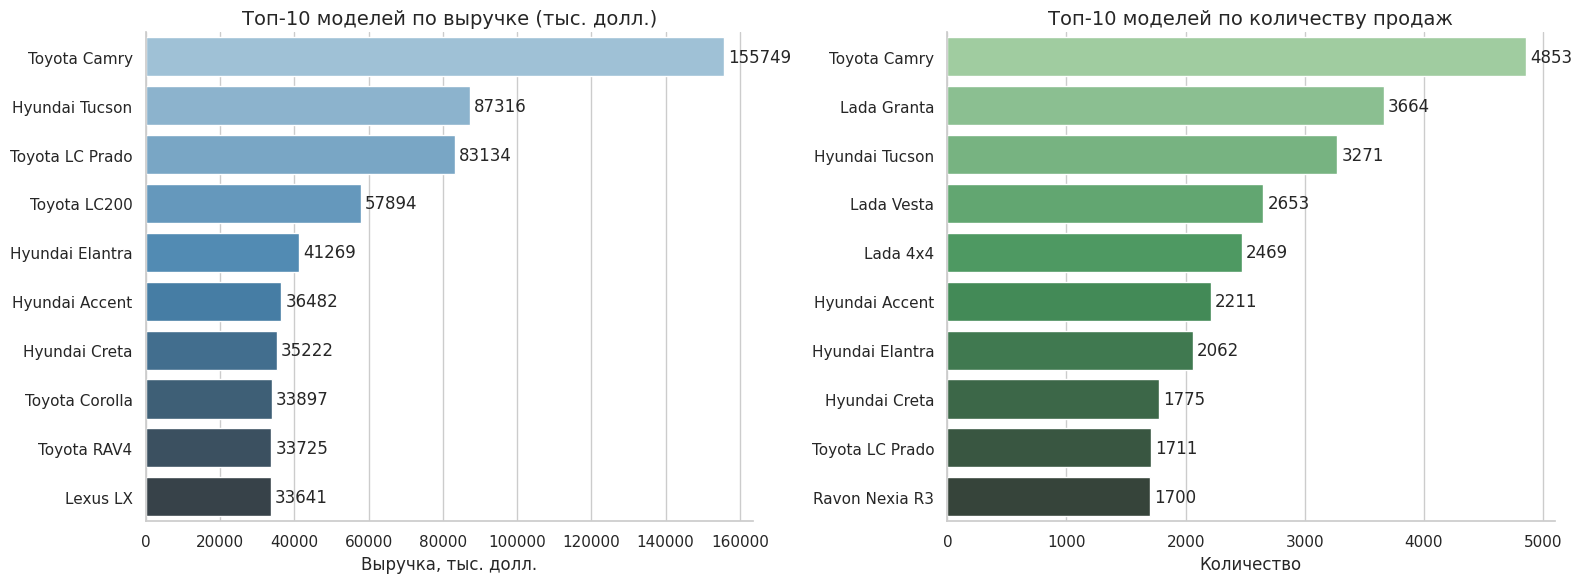

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=model_summary.nlargest(10, 'sales_kusd'),
    x='sales_kusd',
    y='full_model_name',
    hue='full_model_name',
    palette='Blues_d',
    ax=axes[0]
)
axes[0].set_title('Топ-10 моделей по выручке (тыс. долл.)')
axes[0].set_xlabel('Выручка, тыс. долл.')
axes[0].set_ylabel('')
add_labels(axes[0], fmt='{:.0f}')  # Добавляем подписи

# График по количеству
sns.barplot(
    data=model_summary.nlargest(10, 'quantity'),
    x='quantity',
    y='full_model_name',
    hue='full_model_name',
    palette='Greens_d',
    ax=axes[1]
)
axes[1].set_title('Топ-10 моделей по количеству продаж')
axes[1].set_xlabel('Количество')
axes[1].set_ylabel('')
add_labels(axes[1], fmt='{:.0f}')  # Добавляем подписи

plt.tight_layout()
plt.show()

**Выводы по топ-10 моделям автомобилей** (по выручке и количеству продаж)

- **Toyota Camry** Абсолютный лидер — Toyota Camry и по выручке и по объему продаж 4,9 тыс.шт. и 156 млн. долл. Это означает, что модель одновременно популярна и дорогая, обеспечивая наибольшую выручку.
- **Hyundai Tucson** и **Toyota LC Prado** Обе модели входят в топ-3 по выручке, и также находятся высоко по количеству продаж (Tucson — 3 место, Prado — 9). Это говорит о хорошем сочетании цены и объёма продаж — особенно у Tucson.   
- **Toyota LC200**  58 млн. долл. и 779 шт.  Модель с высокой стоимостью, но небольшим объёмом продаж.
- **Lexus LX**  34 млн. долл. и всего 332 шт.  Самая дорогая модель среди представленных, минимальные продажи.
- **Hyundai Elantra, Accent, Creta и Toyota Corolla, RAV4**  Уверенные позиции в среднем ценовом сегменте, стабильный спрос  
- **Lada Granta, Vesta, 4x4 и Ravon Nexia R3**  Выручка 17–31 млн. долл. и количество 2,5 - 3,7 тыс.шт.  Говорят о высоком объёме продаж при низкой выручке — бюджетный сегмент**  


**Ключевые выводы для бизнеса:**
- **Toyota Camry** — модель с максимальной отдачей по выручке и объёму, ключевой актив на рынке.  
- **Hyundai** стабильно занимает позиции в среднем сегменте с хорошим балансом цены и спроса.  
- **Премиальные SUV (Lexus, LC200, Prado)** дают значительную выручку за счёт стоимости, несмотря на ограниченный спрос.  
- **Бюджетные модели (Lada, Ravon)** обеспечивают массовость, но требуют оценки рентабельности из-за низкой выручки.

### Проверим гипотезу: стоимость автомобиля зависит от уровня развития области (средней заработной платы по области).

Создадим словарь со средней заработной платой по региону `avg_income_usd_by_oblast` в долларах за 2019 год. Данные полученны с сайта https://stat.gov.kz/ru/.

Для статистической достоверности будем использовать только те области в которых продано более 30 автомобилей.

In [273]:
avg_income_usd_by_oblast = {
    'Республика Казахстан': 273.1,
    'Акмолинская область': 240.7,
    'Актюбинская область': 242.7,
    'Алматинская область': 208.2,
    'Атырауская область': 556.5,
    'Западно-Казахстанская область': 280.7,
    'Жамбылская область': 184.1,
    'Карагандинская область': 278.8,
    'Костанайская область': 242.3,
    'Кызылординская область': 201.5,
    'Мангистауская область': 360.1,
    'Павлодарская область': 278.1,
    'Северо-Казахстанская область': 231.0,
    'Туркестанская область': 137.9,
    'Восточно-Казахстанская область': 256.2,
    'г.Нур-Султан': 425.1,
    'г.Алматы': 393.7,
    'г.Шымкент': 183.8
}

In [274]:
# 1. Посчитаем медианную цену по каждой области, только если продано >= 30 авто
median_price_by_oblast = (
    df.groupby('oblast')['price_usd']
    .agg(['median', 'count'])
    .query('count >= 30')
    .rename(columns={'median': 'median_price_usd'})
    .drop(columns='count')
    .reset_index()
)
# 2. Создадим DataFrame из словаря с доходами
income_df = pd.DataFrame.from_dict(
    avg_income_usd_by_oblast,
    orient='index',
    columns=['avg_income_usd']
).reset_index().rename(columns={'index': 'oblast'})

# 3. Объединим таблицы по региону
oblast_analysis_df = pd.merge(
    median_price_by_oblast,
    income_df,
    on='oblast',
    how='inner'
)

# 4. Посмотрим на результат
oblast_analysis_df.sort_values('median_price_usd', ascending=False)

,oblast,median_price_usd,avg_income_usd
13,г.Алматы,"28,375",394
14,г.Нур-Султан,"26,946",425
10,Мангистауская область,"24,642",360
1,Актюбинская область,"23,533",243
8,Костанайская область,"23,527",242
3,Атырауская область,"23,425",556
6,Западно-Казахстанская область,"22,560",281
11,Павлодарская область,"19,602",278
7,Карагандинская область,"18,826",279
4,Восточно-Казахстанская область,"17,958",256


Данные для анализа получены.

Цель: Понять, есть ли статистически значимая связь между средним доходом населения и медианной ценой автомобилей в регионах. Сформулируем гипотезы:

 - H0: Между уровнем дохода и медианной ценой автомобилей в области нет линейной зависимости. (Корреляция равна нулю: ρ = 0)
 - H1: Между уровнем дохода и медианной ценой автомобилей в области есть линейная зависимость.(Корреляция не равна нулю: ρ ≠ 0)

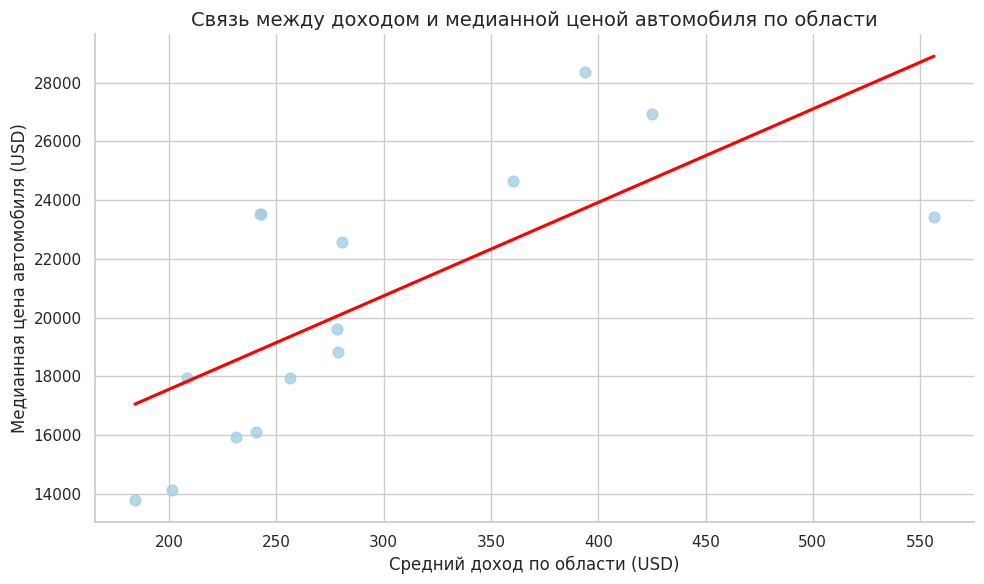

In [275]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=oblast_analysis_df,
    x='avg_income_usd',
    y='median_price_usd',
    scatter_kws={'s': 60},
    line_kws={'color': 'red'},
    ci=None
)

plt.title('Связь между доходом и медианной ценой автомобиля по области')
plt.xlabel('Средний доход по области (USD)')
plt.ylabel('Медианная цена автомобиля (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

На графике наблюдается явная зависимость и носит в целом линейный характер. Проверим на сколько эта зависимость статистически значима.

In [276]:
# Вычисляем коэффициент корреляции Пирсона и p-value
corr_coef, p_value = pearsonr(
    oblast_analysis_df['avg_income_usd'],
    oblast_analysis_df['median_price_usd']
)

print(f"Коэффициент корреляции Пирсона: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")

Коэффициент корреляции Пирсона: 0.700
P-value: 0.00364


**Вывод:**

Существует статистически значимая сильная положительная линейная связь между уровнем дохода и медианной ценой автомобилей по областям Казахстана.
То есть, в регионах с более высоким доходом люди в среднем покупают более дорогие автомобили.

# Анализ положения Меркур Авто.

In [277]:
# Сделаем срез по автоцентру: `mercur auto`.
mercur_df = df[df['company'] == 'mercur auto'].copy()

### Анализ выручки.

Проведем анализ выручки:
 - Общая выручка;
 - Выручка по брендам;
 - Средняя выручка на продажу;
 - Ежемесячная выручка;
 - Ежемесячная выручка по брендам.

In [278]:
# Общая выручка
total_revenue = mercur_df['sales_kusd'].sum()
print(f"Общая выручка Меркур Авто в 2019 году: {total_revenue:,.0f} тыс. долл.")

# Выручка по брендам
revenue_by_brand = (
    mercur_df.groupby('brand')['sales_kusd']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
revenue_by_brand

Общая выручка Меркур Авто в 2019 году: 19,355 тыс. долл.


,brand,sales_kusd
0,Volkswagen,"10,182"
1,Porsche,"5,114"
2,Audi,"4,059"


**Вывод:**

Меркур Авто в 2019 году получил общую выручку 19,355 тыс. долл. США, при этом:
 - Более половины выручки (53%) пришлись на бренд Volkswagen — основной драйвер продаж.
 - Porsche и Audi также внесли существенный вклад — 26% и 21% соответственно.
 - Все три бренда принадлежат Volkswagen Group, что указывает на сильную концентрацию бизнеса на одной автогруппе.

**Бизнес-вывод:** Меркур Авто опирается на ограниченное число брендов, что может быть как сильной стороной (фокус, узнаваемость), так и риском (зависимость от ограниченного портфеля). Стоит рассмотреть диверсификацию.

### Средняя выручка на продажу.

In [279]:
total_quantity = mercur_df['quantity'].sum()

# Считаем среднюю выручку на одну продажу
avg_revenue_per_sale = total_revenue / total_quantity
print(f"Средняя выручка на одну продажу: {avg_revenue_per_sale:.2f} тыс. долл.")

Средняя выручка на одну продажу: 29.78 тыс. долл.


**Вывод:**
Средняя выручка на одну продажу у Mercur Auto в 2019 году составила 29,78 тыс. долл. Это говорит о том, что дилер специализируется на продаже дорогих автомобилей — выше средней медианы по регионам (где медиана варьировалась от ~14 до ~28 тыс. долл.).

**Для бизнеса это означает:**
 - ориентир на средне-высокий ценовой сегмент;
 - возможный упор на премиальные марки (что подтверждается высокой долей Porsche и Audi в выручке).

### Ежемесячная выручка.

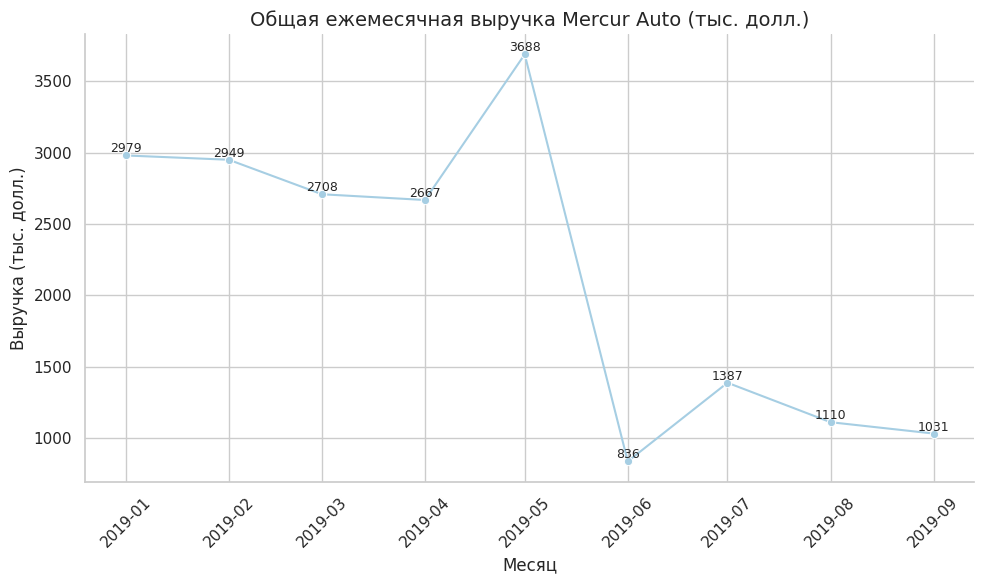

In [280]:
# 1. Общая ежемесячная выручка (в тыс. долл.)
monthly_sales = (
    mercur_df.groupby('sale_date')['sales_kusd']
    .sum()
    .reset_index()
    .rename(columns={'sales_kusd': 'monthly_sales_kusd'})
)

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=monthly_sales, x='sale_date', y='monthly_sales_kusd', marker='o')
plt.title('Общая ежемесячная выручка Mercur Auto (тыс. долл.)')
plt.xlabel('Месяц')
plt.ylabel('Выручка (тыс. долл.)')
plt.xticks(rotation=45)
plt.grid(True)

# Добавим подписи к каждой точке
for x, y in zip(monthly_sales['sale_date'], monthly_sales['monthly_sales_kusd']):
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Вывод:**
 - С января по апрель уровень выручки держался в пределах 2,6 - 3,0 млн. долл, затем был пик в мае (3,7 млн. долл.).
 - В июне происходит резкий провал выручки — она падает почти в 4 раза по сравнению с маем. После июня выручка остаётся ниже пиковых значений и не восстанавливается до уровня весенних месяцев.
 - Такой резкий спад, не очень понятен, так как общая динамика рынка автомобилей Казахстана наоборот показывает уверенный рост с пиком продаж в июле. Значит это скорее всего внутренние факторы, посмотрим ежемесячную выручку по брендам.

### Ежемесячная выручка по брэндам.

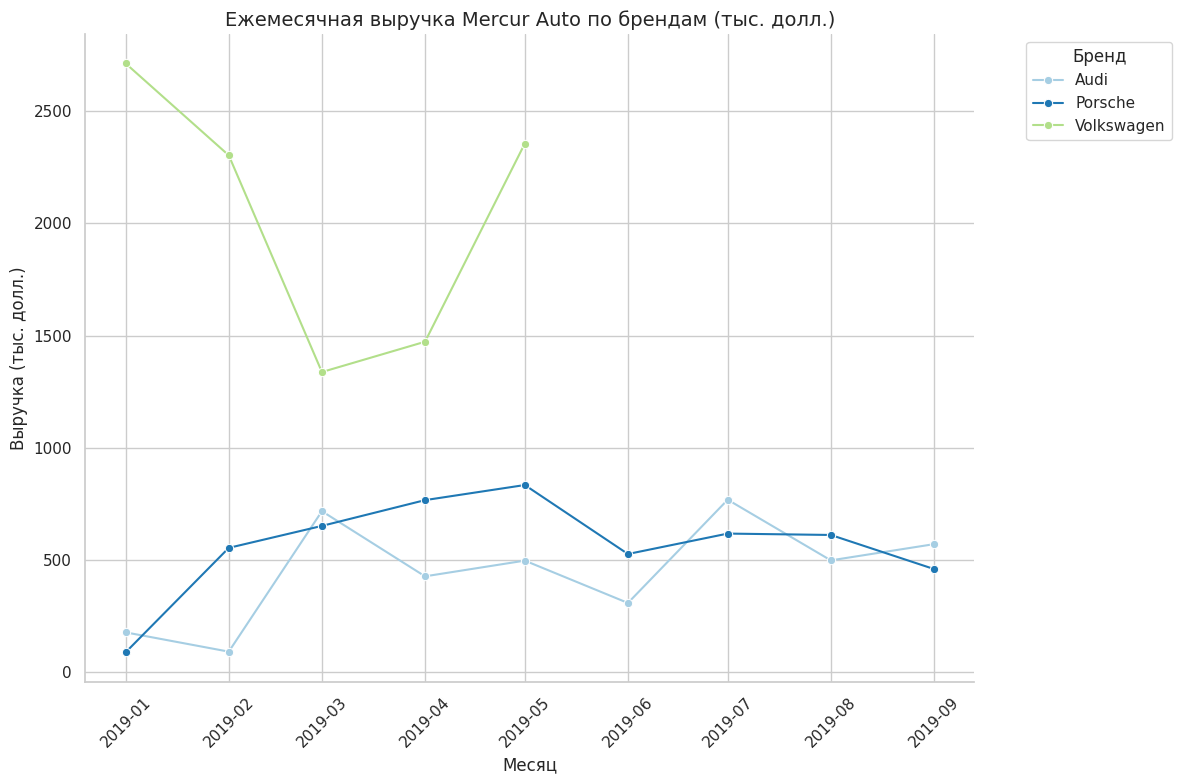

In [281]:
# Ежемесячная выручка по брендам
monthly_sales_by_brand = (
    mercur_df.groupby(['sale_date', 'brand'])['sales_kusd']
    .sum()
    .reset_index()
    .rename(columns={'sales_kusd': 'monthly_sales_kusd'})
)
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_sales_by_brand, x='sale_date', y='monthly_sales_kusd', hue='brand', marker='o')
plt.title('Ежемесячная выручка Mercur Auto по брендам (тыс. долл.)')
plt.xlabel('Месяц')
plt.ylabel('Выручка (тыс. долл.)')
plt.xticks(rotation=45)
plt.legend(title='Бренд', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Добавим подписи к каждой точке
for x, y in zip(monthly_sales['sale_date'], monthly_sales['monthly_sales_kusd']):
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Вывод:**
 - В период с января по май 2019 года выручка от продаж автомобилей Volkswagen была основной и составляла крупнейшую долю в общей выручке автосалона Mercur Auto. Например, в январе она достигала 2,7 млн долл., в мае — 2,4 млн долл.
 - В июне продажи Volkswagen полностью исчезают, что и объясняет резкий спад общей выручки автосалона почти в 4 раза. В июне на графике остаются только Audi и Porsche.
 - С июня по сентябрь продажи Volkswagen отсутствуют, а выручка удерживается только за счёт Audi и Porsche, причём на гораздо более низком уровне (около 0,8–1,4 млн долл. в месяц).
 - Это подтверждает гипотезу: провал выручки в июне связан с прекращением продаж бренда Volkswagen. Это, вероятно, связано с внутренними изменениями в дистрибуции, ассортименте или стратегии компании.

### Продажи по регионам: общие, по маркам.

In [282]:
# Группировка по регионам
region_sales = (
    mercur_df.groupby('region')['sales_kusd']
    .sum()
    .reset_index()
    .rename(columns={'sales_kusd': 'region_sales_kusd'})
    .sort_values(by='region_sales_kusd', ascending=False)
)
# Группировка по регионам и брендам
region_brand_sales = (
    mercur_df.groupby(['region', 'brand'])['sales_kusd']
    .sum()
    .reset_index()
    .rename(columns={'sales_kusd': 'region_sales_kusd'})
    .sort_values(by='region_sales_kusd', ascending=False)
)

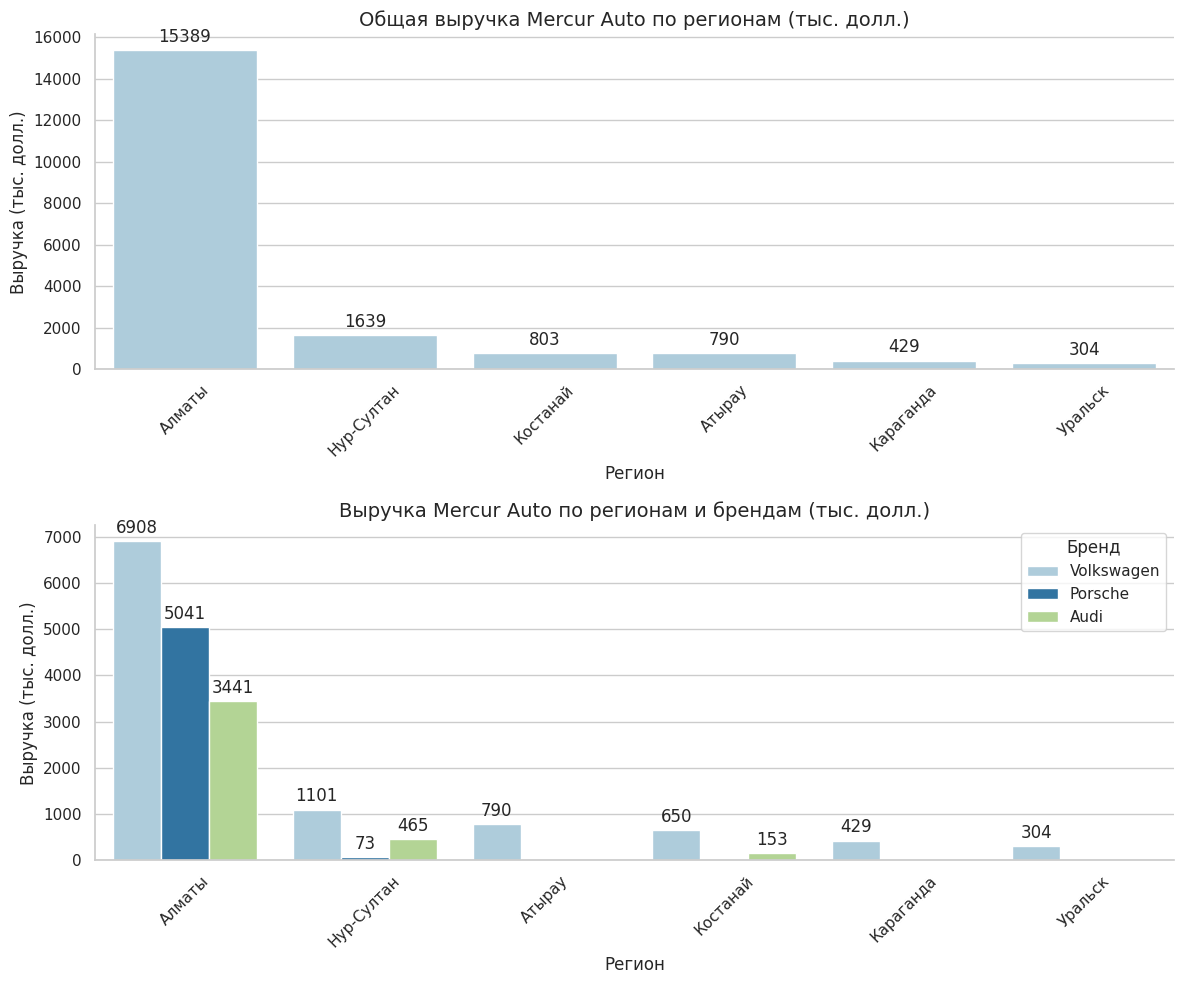

In [283]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# 1. Общая выручка по регионам
sns.barplot(
    data=region_sales,
    x='region',
    y='region_sales_kusd',
    ax=axs[0]
)
axs[0].set_title('Общая выручка Mercur Auto по регионам (тыс. долл.)')
axs[0].set_xlabel('Регион')
axs[0].set_ylabel('Выручка (тыс. долл.)')
add_labels(axs[0])  # функция подписей
axs[0].tick_params(axis='x', rotation=45)

# 2. Выручка по регионам и брендам
sns.barplot(
    data=region_brand_sales,
    x='region',
    y='region_sales_kusd',
    hue='brand',
    ax=axs[1]
)
axs[1].set_title('Выручка Mercur Auto по регионам и брендам (тыс. долл.)')
axs[1].set_xlabel('Регион')
axs[1].set_ylabel('Выручка (тыс. долл.)')
add_labels(axs[1])  # функция подписей
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(title='Бренд')

plt.tight_layout()
plt.show()

**📌 Выводы:**
 - Алматы — абсолютный лидер по выручке: более 15 млн долл. (80% всех продаж), продажи здесь формируют почти весь доход автосалона.
 - Основные бренды в Алматы:
    - Volkswagen — 6,9 млн долл.
    - Porsche — 5 млн долл.
    - Audi — 3,4 млн долл.
 - Нур-Султан занимает 2-е место (1,6 млн), где также преобладает Volkswagen, за ним Audi.
 - В остальных регионах продажи скромные и ограничены в основном Volkswagen (Атырау, Караганда, Уральск) и немного Audi (Костанай).
 - Видно, что Volkswagen — ключевой бренд во всех регионах, кроме Алматы, где также высоки продажи Porsche и Audi.

**Это подтверждает,** что Mercur Auto в первую очередь ориентирован на рынок Алматы, и дальнейшие стратегические решения стоит выстраивать с опорой на этот регион.

## Конкурентный анализ

Для понимания полного профиля Mercur Auto необходимо определить автомобили какого класса они в основном продают.

In [284]:
class_2013_sales = (
    mercur_df.groupby('class_2013', observed=True)['sales_kusd']
    .sum()
    .loc[lambda x: x > 0]  # фильтрация сразу внутри цепочки
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'sales_kusd': 'class_2013_sales_kusd'})
)
class_2013_sales

,class_2013,class_2013_sales_kusd
0,B класс,"6,419"
1,Полноразмерные SUV,"6,114"
2,Компактные SUV,"2,643"
3,F класс,"1,637"
4,E класс,779
5,Среднеразмерные SUV,676
6,Полноразмерный Минивэн,284
7,Спортивные автомобили,270
8,Микроавтобусы,251
9,C класс,114


Основной доход дилеру приносят B-класс (6,4 млн долл.) и SUV-сегмент — полноразмерные (6,1 млн) и компактные (2,6 млн). Также заметна доля премиального F-класса (1,6 млн долл.), что говорит о фокусе на средний и премиальный сегмент.

### Профиль `Mercur Auto`.

На основе данных:
 - Бренды: Volkswagen, Audi, Porsche
 - Ценовой сегмент: от среднего до премиального
 - Классы авто: B-класс, компактные и полноразмерные SUV, F-класс
 - Регионы: Алматы (≈79%), Нур-Султан (≈8%), немного в других
 - Общая выручка компании: около 19,4 млн долл.

**Покупатели Mercur Auto:**
— преимущественно из Алматы, ищут либо качественный городской автомобиль, либо престижный SUV/седан.

### Определяем конкурентов `Mercur Auto`.

**1. География продаж**
 - Компании считаются потенциальными конкурентами только в случае географического пересечения с Mercur Auto, в первую очередь в ключевых регионах — Алматы и Нур-Султан. Это базовое условие: если компания не представлена в этих городах, она не участвует в дальнейшем сравнении.

**2. Перекрытие по брендам, классам и доли рынка в ключевых сегментах**
 - По брендам: Mercur Auto продаёт Volkswagen, Audi, Skoda. Конкурентами считаются компании, у которых также есть продажи этих брендов.
 - По классам автомобилей: в приоритете те классы, которые приносят наибольшую выручку Mercur Auto (например, SUV, B-класс). Конкурентами являются компании, работающие в этих же классах.
 - По доле рынка: значимыми считаются компании, которые занимают не менее 10% в ключевых для Mercur Auto брендах и классах. Это говорит о конкуренции за одну и ту же целевую аудиторию.


**3. Присвоение баллов**
 - За каждое пересечение (по географии, брендам, классам, доле) компаниям начисляются баллы. Чем больше пересечений и выше показатели, тем выше итоговая конкурентная оценка.
Компании с наибольшим количеством баллов считаются прямыми конкурентами Mercur Auto

Как отобрать конкурентов. Мы будем искать компании, которые:
 - Имеют сопоставимую выручку — не слишком мелкие и не сильно крупнее
 - Активны в тех же регионах (особенно Алматы и Нур-Султан)
 - Продают похожие бренды или аналогичные классы автомобилей

In [285]:
geo_companies = (
    df.pivot_table(index='company', columns='region', values='sales_kusd', aggfunc='sum', fill_value=0)
      .astype(bool)
      .pipe(lambda x: x.loc[:, x.loc['mercur auto']])  # регионы, где активен Mercur Auto
      .pipe(lambda x: x[x.any(axis=1)])  # компании, у которых есть хотя бы один общий регион
      .index
)

df_geo = df[df['company'].isin(geo_companies)]

In [286]:
brand_score = (
    df_geo.pivot_table(index='company', columns='brand', values='sales_kusd',
                   aggfunc='sum', fill_value=0)
      .astype(bool)
      .pipe(lambda x: x.mul(x.loc['mercur auto'], axis=1)
                      .sum(axis=1)
                      .drop('mercur auto'))
      .reset_index()
      .rename(columns={0: 'brand_score'})
      .sort_values('brand_score', ascending=False)
)
brand_score.head()

,company,brand_score
5,avtodom motors kst,1
6,avtomir gk,1
10,eurasia motor,1
29,volkswagen group rus,1
1,almaty motors premium,0


In [287]:
class_score = (
    df_geo.pivot_table(index='company', columns='class_2013', values='sales_kusd',
                   aggfunc='sum', fill_value=0)
      .pipe(lambda x: x.loc[:,
          (x.loc['mercur auto'] / x.loc['mercur auto'].sum()) > 0.10])  # выбираем классы с >10% выручки у Mercur Auto
      .astype(bool)  # есть продажи — True/False
      .mul(1)  # просто для удобства (можно убрать, но пусть будет)
      .sum(axis=1)  # считаем количество пересекающихся классов
      .drop('mercur auto')
      .reset_index()
      .rename(columns={0: 'class_score'})
      .sort_values('class_score', ascending=False)
)
class_score.head()

/tmp/ipython-input-4176674511.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_geo.pivot_table(index='company', columns='class_2013', values='sales_kusd',


,company,class_score
3,autocenter bavaria,3
6,avtomir gk,3
7,bipek auto,3
10,eurasia motor,3
29,volkswagen group rus,3


In [288]:
market_share = (
    df_geo.pivot_table(index='company', columns='brand', values='sales_kusd', aggfunc='sum', fill_value=0)
      .pipe(lambda x: x.loc[:, (x.loc['mercur auto'] / x.loc['mercur auto'].sum()) > 0.05])  # выбираем ключевые бренды
      .pipe(lambda x: x.div(x.sum(axis=0), axis=1))  # считаем долю рынка для каждой компании по бренду
      .drop('mercur auto')  # исключаем самого себя
      .stack()
      .reset_index(name='brand_share')
      .sort_values('brand_share', ascending=False)# ← вот здесь создаётся колонка 'brand_share'
)

market_share_class = (
    df_geo.pivot_table(index='company', columns='class_2013',
                   values='sales_kusd', aggfunc='sum', fill_value=0)
      .pipe(lambda x: x.loc[:, (x.loc['mercur auto'] / x.loc['mercur auto'].sum()) > 0.05])
      .pipe(lambda x: x.div(x.sum(axis=0), axis=1))  # ← правильное деление: сразу передаём Series
      .drop('mercur auto')
      .stack()
      .reset_index(name='class_share')
      .query('class_share > 0.05')
      .sort_values('class_share', ascending=False)
)
print(market_share.head())
market_share_class.head()

                 company       brand  brand_share
89  volkswagen group rus  Volkswagen            1
17    avtodom motors kst  Volkswagen            0
20            avtomir gk  Volkswagen            0
32         eurasia motor  Volkswagen            0
2             allur auto  Volkswagen            0


/tmp/ipython-input-352830944.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_geo.pivot_table(index='company', columns='class_2013',


,company,class_2013,class_share
107,toyota motor kazakhstan,Полноразмерные SUV,1
28,bipek auto,B класс,1
10,astana motors,Компактные SUV,0
105,toyota motor kazakhstan,F класс,0
8,astana motors,B класс,0


In [289]:
# Группируем по company, если нужно (для market_share и market_share_class)
market_score = market_share.groupby('company')['brand_share'].sum().reset_index(name='market_share_score')
market_class_score = market_share_class.groupby('company')['class_share'].sum().reset_index(name='market_share_class_score')

# Собираем все скор-таблицы
score_df = (
    reduce(lambda left, right: pd.merge(left, right, on='company', how='outer'),
           [brand_score, class_score, market_score, market_class_score])
    .fillna(0)
    .assign(
        total_score = lambda x: x[['brand_score', 'class_score', 'market_share_score', 'market_share_class_score']]
                                .sum(axis=1)
                                .round()
                                .astype(int)
    )
    .sort_values('total_score', ascending=False)
    .reset_index(drop=True)
)

score_df.head(10)

,company,brand_score,class_score,market_share_score,market_share_class_score,total_score
0,volkswagen group rus,1,3,1,0,5
1,bipek auto,0,3,0,1,4
2,eurasia motor,1,3,0,0,4
3,avtomir gk,1,3,0,0,4
4,autocenter bavaria,0,3,0,0,3
5,avtodom motors kst,1,2,0,0,3
6,toyota motor kazakhstan,0,2,0,1,3
7,astana motors,0,2,0,1,3
8,autokapital,0,2,0,0,2
9,almaty motors premium,0,2,0,0,2


**Выводы:**

**Volkswagen Group Rus — ключевой прямой конкурент.**
 - Совпадают бренды (VW) и классы, есть и рыночная доля.
 - Это — единственная компания с полным совпадением по 3 критериям.
   
**Avtomir GК и Eurasia Motor** — потенциальные конкуренты по бренду и классу, но без сильной рыночной позиции.
 - Возможно, работают на локальных рынках или слабо представлены.

**Bipek Auto** — важен по сегментам (классам), но прямым конкурентом не является так как объемы выручки не сопоставимы. Поэтому из конкурентного анализа его так же исключаем.

**Остальные (с total_score 3 и ниже)** — косвенные конкуренты, работающие в тех же классах, но с другими брендами. Для конкурентного анализа их проигнорируем.

**Стратегический вывод:**
 - Для конкурентного анализа Mercur Auto стоит в первую очередь:
 - Сравнивать себя с Volkswagen Group Rus
 - Следить за активностью Avtomir GK и Eurasia Motor
 - Учитывать Bipek Auto как игрока в массовом сегменте

### Конкурентный анализ с `Volkswagen Group Rus`, `Avtomir GK`, `Eurasia Motor`.

1. Сравнение по объему и динамике продаж
	•	Общая выручка по компаниям.
	•	Динамика по месяцам (особенно до и после июля).
	•	Кто “поднялся” после ухода VW?

📊 График: линии по месяцам для Mercur и конкурентов.

⸻

2. Сравнение по структуре продаж
	•	Какие бренды и классы продает каждый.
	•	Как изменилась структура Mercur Auto после потери Volkswagen.
	•	Кто из конкурентов теперь силен в тех же сегментах?

📊 График: stacked bar или тепловая карта.

⸻

3. Ценовой и модельный анализ
	•	Кто продаёт в том же ценовом диапазоне?
	•	Какие модели или классы стали заменой VW у Mercur?
	•	Кто занял эту нишу — Hyundai, Kia, Chery?

In [290]:
# Итоговый список конкурентов Mercur Auto
# Отбор нужных компаний, кроме Bipek Auto
companies_to_plot = [
    c for c in score_df.query('total_score >= 4')['company'].tolist() + ['mercur auto']
    if 'bipek' not in c.lower()
]

### Посмотрим, как Mercur Auto и конкуренты продавали по месяцам, и сравнить динамику.

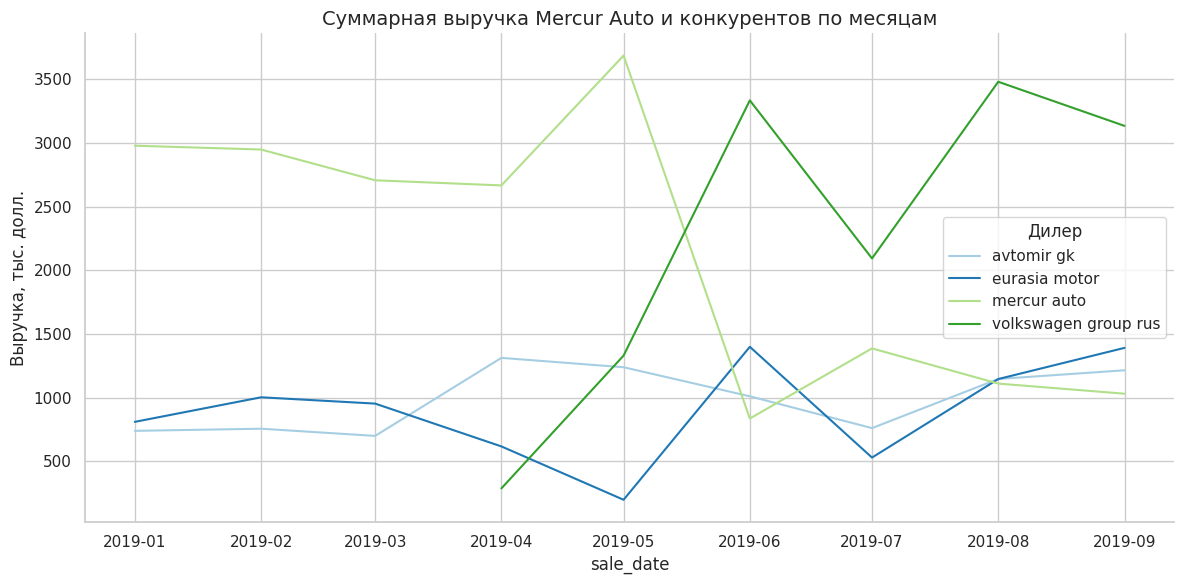

In [291]:
# Группировка по дате и компании — суммарная выручка
agg_df = df.groupby(['sale_date', 'company'], as_index=False)['sales_kusd'].sum()


# Построение графика
sns.lineplot(
    data=agg_df[agg_df['company'].isin(companies_to_plot)],
    x='sale_date',
    y='sales_kusd',
    hue='company',
    errorbar=None
)

plt.title('Суммарная выручка Mercur Auto и конкурентов по месяцам')
plt.ylabel('Выручка, тыс. долл.')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Дилер')
plt.show()

**Вывод:**
 - Mercur Auto: В начале года выручка превышает конкурентов в 3 раза, резкий спад с июля — вероятно, из-за ухода бренда Volkswagen из ассортимента. И выручка спустилась до уровня конкурентов около 1,5 млн. долл.
 - Volkswagen Group Rus: Появляется с апреля и быстро растёт — возможно, стал официальным дилером Volkswagen, забрав бренд у Mercur Auto.
 - С Avtomir GK: Стабильный рост продаж и относительно высокий уровень выручки в течение года.
 - Eurasia Motor: Нестабильная динамика с пиками в июне и сентярбре, провалы в мае и июле.

### Сравнение структуры продаж, какие бренды продает каждый автосалон.

In [292]:
sales_pivot = pd.pivot_table(
    df[df['company'].isin(companies_to_plot)],
    values='sales_kusd',
    index='company',
    columns='brand',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Total'
)
sales_pivot

brand,Audi,Cadillac,Chevrolet,Mazda,Porsche,Volkswagen,Total
company,,,,,,,
avtomir gk,0,0,0,"8,217",0,661,"8,878"
eurasia motor,0,"5,854","1,871",0,0,320,"8,045"
mercur auto,"4,059",0,0,0,"5,114","10,182","19,355"
volkswagen group rus,0,0,0,0,0,"13,663","13,663"
Total,"4,059","5,854","1,871","8,217","5,114","24,826","49,941"


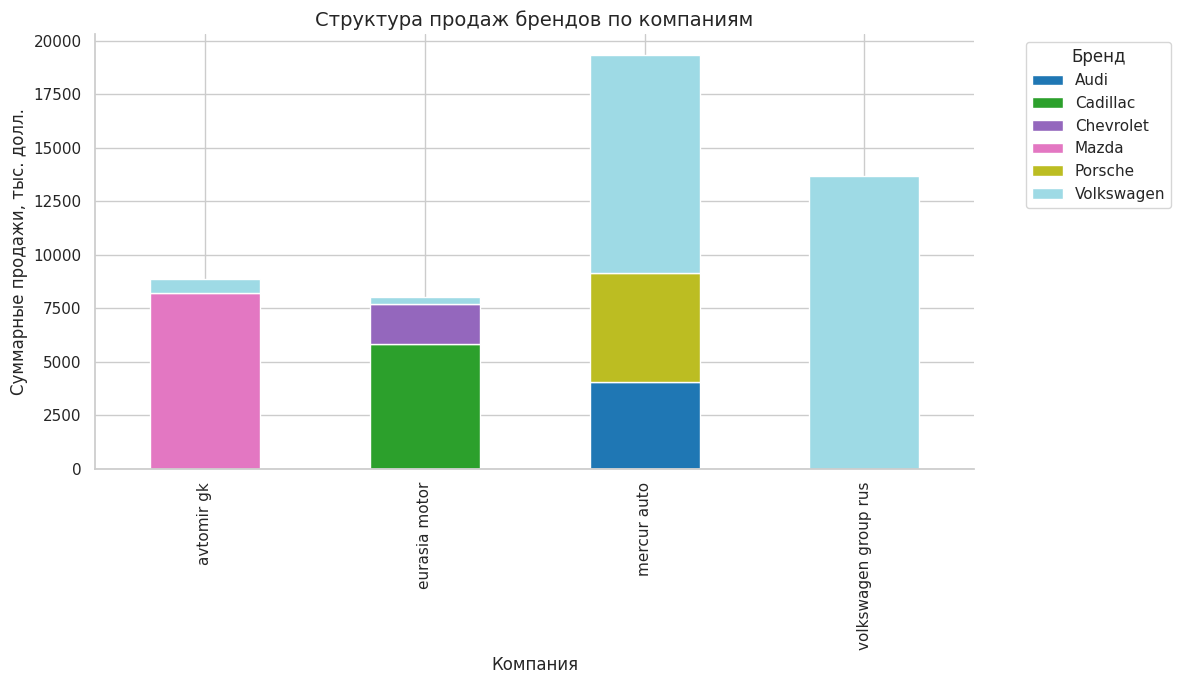

In [293]:
sales_pivot.drop('Total', axis=0).drop('Total', axis=1).plot(
    kind='bar', stacked=True, figsize=(12, 7), colormap='tab20'
)
plt.title('Структура продаж брендов по компаниям')
plt.ylabel('Суммарные продажи, тыс. долл.')
plt.xlabel('Компания')
plt.legend(title='Бренд', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Вывод:**
 - Mercur Auto — лидер с продажами 19,355 тыс. долл., преимущественно по Audi, Porsche и Volkswagen.
 - Volkswagen Group Rus сосредоточена только на Volkswagen с продажами 13,663 тыс. долл.
 - Avtomir GK (8,878 тыс.) сильна в Mazda, Eurasia Motor (8,045 тыс.) — в Cadillac и Chevrolet.
 - Конкуренция по брендам минимальна, Mercur Auto и Volkswagen Group Rus пересекаются только по Volkswagen.
 - Volkswagen — самый крупный бренд по продажам с общим объемом 24,826 тыс. долл.

### Анализ средней цены `Mercur Auto` и конкурентов.

In [294]:
median_price_df = df[df['company'].isin(companies_to_plot)].pivot_table(
    index='sale_date',
    columns='company',
    values='price_usd',
    aggfunc='median'
)
median_price_df

company,avtomir gk,eurasia motor,mercur auto,volkswagen group rus
sale_date,,,,
2019-01-01,"24,964","53,970","14,113",NaN
2019-02-01,"26,684","71,429","15,058",NaN
2019-03-01,"26,746","75,198","16,069",NaN
2019-04-01,"24,887","44,160","15,927","40,838"
2019-05-01,"16,361","69,422","14,186","37,501"
2019-06-01,"27,608","69,129","86,453","32,433"
2019-07-01,"27,481","75,198","78,940","32,284"
2019-08-01,"27,274","75,350","78,038","32,040"
2019-09-01,"27,249","75,350","100,705","32,010"


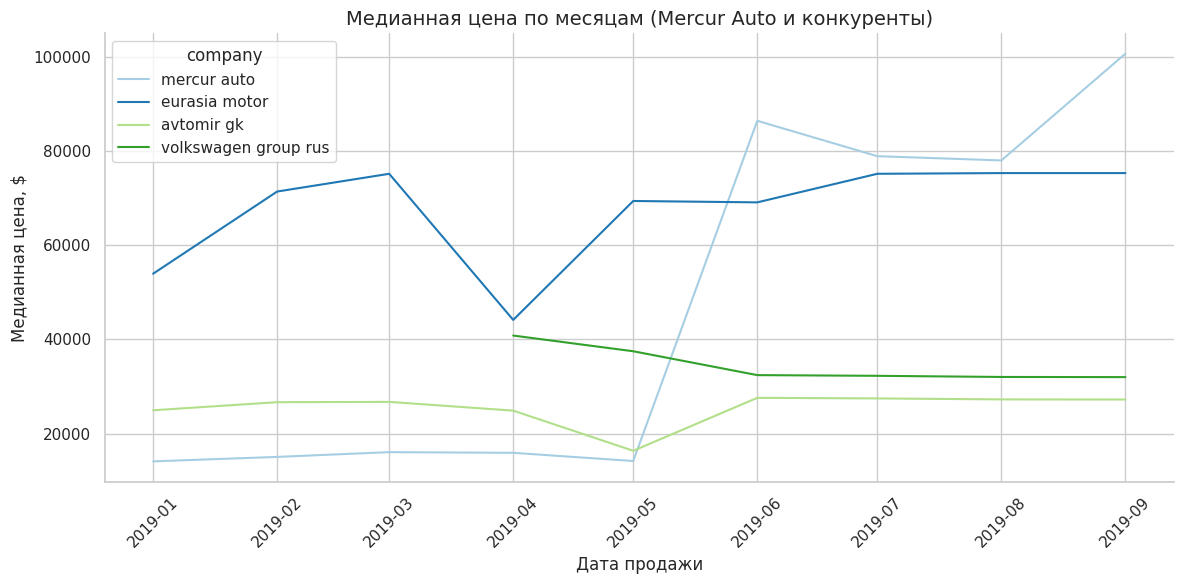

In [295]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df[df['company'].isin(companies_to_plot)],
    x='sale_date',
    y='price_usd',
    hue='company',
    estimator='median',
    errorbar=None
)
plt.title('Медианная цена по месяцам (Mercur Auto и конкуренты)')
plt.xlabel('Дата продажи')
plt.ylabel('Медианная цена, $')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Выводы по медианным ценам для каждой компании**
 - **Merkur Auto:** В начале года продавал автомобили по самой низкой медианной цене (14–16 тыс. долл.), но с июня, после ухода бренда Volkswagen, цена резко выросла до 86 тыс. долл. и выше. Это указывает на смещение в премиум-сегмент (Audi, Porsche).
 - **Volkswagen Group Rus:** Появились в апреле с медианой 41 тыс. долл., но дальше цены снизились до 32 тыс. долл. Несмотря на спад цен, они остаются выше, чем у Merkur Auto в начале года.
 - **Eurasia Motor:** В начале года средняя цена была в районе 53 тыс. долл, но к сентябрю стабилизировалась на уровне 75 тыс. долл. Это указывает на фокус в верхнем ценовом сегменте.
 - **Avtomir GK:** Стабилен — от 25 до 27 тыс. долл в разные месяцы (с провалом в апреде до 16 тыс.долл). Работает в среднем ценовом сегменте.

**Общий вывод:**
После потери Volkswagen Mercur Auto сместился в премиум-сегмент, а Volkswagen Group Rus заняли освободившуюся нишу с более высокими ценами.

## BCG анализ (анализ продаж по моделям)

BCG-анализ по моделям — это метод оценки ассортимента автомобилей по двум параметрам:
 - доля модели в продажах дилера (внутренний рынок)
 - темп роста продаж модели во времени

Он помогает определить, какие модели: приносят основную выручку (зввезды), стабильны, но не растут (дойные коровые), перспективны, но пока малопродуктивны (Вопросы), устарели или не продаются (Собаки). Чтобы принимать решения: какие модели поддерживать, развивать или выводить.

In [296]:
# Группируем по моделям, считаем количество продаж
model_sales = (
    mercur_df.groupby('full_model_name')
    .agg(total_quant=('quantity', 'sum'))
    .reset_index()
)

# Считаем долю модели в общих продажах
total = model_sales['total_quant'].sum()
model_sales['market_share'] = (model_sales['total_quant'] / total).map('{:.2f}'.format)

# Сортируем по продажам по убыванию
model_sales = model_sales.sort_values(by='total_quant', ascending=False).reset_index(drop=True)

In [297]:
# Используем .loc для безопасного присвоения
mercur_df.loc[:, 'half'] = mercur_df['sale_date'].dt.month.map(lambda x: 'H1' if x <= 4 else 'H2')

# Группируем: считаем продажи по модели и периоду
half_sales = (
    mercur_df
    .groupby(['full_model_name', 'half'])['quantity']
    .sum()
    .unstack(fill_value=0)
    .rename(columns={'H1': 'sales_h1', 'H2': 'sales_h2'})
)

# Считаем темп прироста (относительный)
half_sales['growth_rate'] = (half_sales['sales_h2'] - half_sales['sales_h1']) / half_sales['sales_h1'].replace(0, np.nan)

# Сброс индекса для удобства
half_sales = half_sales.reset_index()

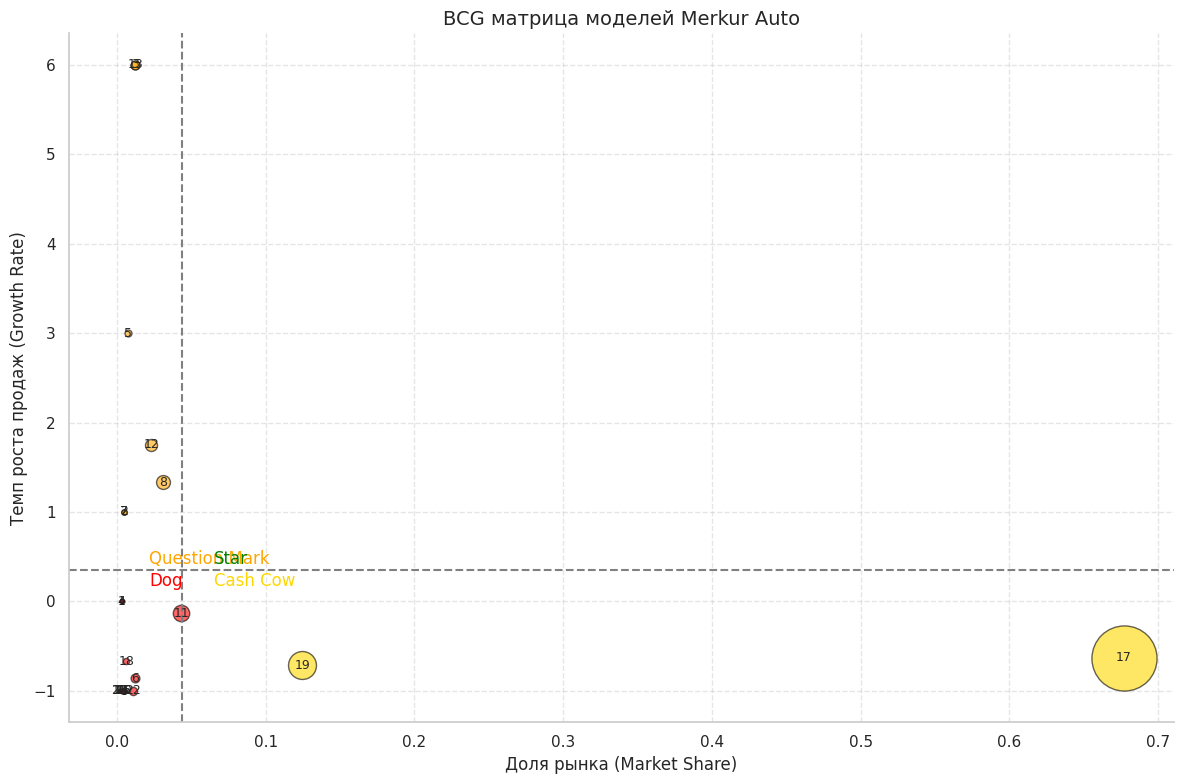

,ID,full_model_name,category,total_quant,market_share,growth_rate
18,19,Volkswagen Tiguan,Cash Cow,81,0,-1
16,17,Volkswagen Polo,Cash Cow,440,1,-1
0,1,Audi A3,Dog,2,0,0
20,21,Volkswagen Transporter,Dog,2,0,-1
19,20,Volkswagen Touareg,Dog,3,0,-1
17,18,Volkswagen Teramont,Dog,4,0,-1
15,16,Volkswagen Multivan,Dog,3,0,-1
14,15,Volkswagen Jetta,Dog,3,0,-1
13,14,Volkswagen Amarok,Dog,2,0,-1
21,22,Volkswagen Transporter Kasten,Dog,7,0,-1


In [298]:
import matplotlib.patches as mpatches
model_sales['market_share'] = model_sales['total_quant'] / model_sales['total_quant'].sum()
bcg_df = half_sales.merge(model_sales, on='full_model_name', how='left').fillna({'growth_rate':0})

mean_ms = bcg_df['market_share'].mean()
mean_gr = bcg_df['growth_rate'].mean()

def cat(r):
    if r.market_share >= mean_ms and r.growth_rate >= mean_gr: return 'Star'
    if r.market_share >= mean_ms: return 'Cash Cow'
    if r.growth_rate >= mean_gr: return 'Question Mark'
    return 'Dog'

bcg_df['category'] = bcg_df.apply(cat, axis=1)
bcg_df['ID'] = range(1, len(bcg_df)+1)

colors = {'Star':'green', 'Cash Cow':'gold', 'Question Mark':'orange', 'Dog':'red'}

plt.figure(figsize=(12,8))
for _, r in bcg_df.iterrows():
    plt.scatter(r.market_share, r.growth_rate, s=r.total_quant*5, color=colors[r.category], alpha=0.6, edgecolors='k')
    plt.text(r.market_share, r.growth_rate, str(r.ID), ha='center', va='center', fontsize=9)

plt.axvline(mean_ms, linestyle='--', color='grey')
plt.axhline(mean_gr, linestyle='--', color='grey')

plt.text(mean_ms*0.5, mean_gr*1.2, 'Question Mark', color='orange', fontsize=12)
plt.text(mean_ms*1.5, mean_gr*1.2, 'Star', color='green', fontsize=12)
plt.text(mean_ms*0.5, mean_gr*0.5, 'Dog', color='red', fontsize=12)
plt.text(mean_ms*1.5, mean_gr*0.5, 'Cash Cow', color='gold', fontsize=12)

plt.xlabel('Доля рынка (Market Share)')
plt.ylabel('Темп роста продаж (Growth Rate)')
plt.title('BCG матрица моделей Merkur Auto')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Выводим таблицу с ID и названиями моделей, чтобы понимать, что за цифры на графике
display(bcg_df[['ID', 'full_model_name', 'category', 'total_quant', 'market_share', 'growth_rate']].sort_values(by='category'))

**Выводы по квадратам**

**Cash Cows**
 - Volkswagen Polo (440 шт.) и Tiguan (81 шт.) обеспечили 84% всех продаж, но обе модели обнулились из-за ухода VW.
 - Категория исчезает, а вместе с ней — основа выручки.

**Question Marks**
 - 7 моделей Audi и Porsche показали рост, лидеры — Porsche Panamera и Audi A6 (+6x).
 - Потенциальный резерв для роста, требует продвижения и инвестиций.

**Dogs**
 - 15 моделей, включая Audi Q5, Cayenne и Jetta, — объёмы до 8 шт., прироста нет.
 - Неэффективны, рекомендуется вывод из активного ассортимента.

**Стратегический вывод**
 - Потеря VW = обрушение ключевого сегмента.
 - Новый фокус — на растущие модели Audi и Porsche.
 - Нужна реструктуризация портфеля: усилить Question Marks, сократить Dogs.

# Итоговые выводы по авторынку Казахстана за 2019 год.

**Динамика рынка**

Авторынок показал стабильный рост в 1-м полугодии: с 4,474 до 7,778 авто (+74%) и выручкой с 113 млн долл  до 203 млн долл. Пик пришёлся на июль, что подтверждает выраженную сезонность. Самый слабый месяц — февраль.


**Ёмкость рынка**

В 2019 году продано 62,8 тыс авто на 1.71 млрд. долл (данные оценочные, так как 4 квартал заполнен расчётно). Средняя цена — 24 тыс. долл. Рынок средней ёмкости с устойчивым спросом и выраженной сезонностью.

**Сегментный анализ**

Внедорожники — безусловный лидер по выручке (пик — 89 млн долл. в июле). Легковые и коммерческие авто занимают вторые позиции (63.3 млн долл.  46 млн долл соответственоо). Минивэны и пикапы — на периферии рынка, объёмы менее 5 млн долл в месяц.

**Региональный анализ**

Алматы (14 тыс. авто, 426 млн долл) и Нур-Султан (10 тыс., 293 млн долл) формируют ядро рынка. Далее — Костанай, Шымкент, Атырау (75–88 млн долл.). Остальные регионы существенно отстают, что говорит о сильной концентрации спроса.

**Автоцентры (топ-12)**

 - Лидеры по выручке — Toyota Motor KZ (479.9 млн долл), Astana Motors (229.3 млн долл).
 - Bipek Auto — лидер по количеству (15 тыс. авто и 186 млн.долл), но с низкой средней ценой (11 тыс долл).
 - Autocenter Bavaria (454 авто, 29.2 млн долл.) и TK Kamaz (893 авто, 46.2 млн долл) - нишевые игроки, продают меньше, но с высокой средней ценой за единицу, вероятно, в премиум или спец. сегментах. Средняя цена авто 49 тыс. долл.
 -  Mercur Auto — занимает скромную позицию в конце списк (650 авто, 19.4 млн долл).

**Бренды**
 - Toyota — лидер по выручке (402,5 тыс. долл.) и один из лидеров по количеству продаж (10,745 шт.): сильная позиция на рынке.
 - Hyundai — второе место по выручке (229,3 тыс. долл.) и также высокая доля по количеству (10,168 шт.): стабильный крупный игрок.
 - Lada — первое место по количеству продаж (11,092 шт.), но с относительно низкой выручкой (107,8 тыс. долл.): массовый бюджетный сегмент.
 - Lada, Toyota и Hyundai по объёму продаж в разы опережают остальных: у них более 10 тыс. проданных автомобилей, тогда как у всех других брендов — не более 2,5 тыс. Это подчёркивает их доминирующее положение на рынке.
 - 	Lexus — мало продано (1,206 шт.), но высокая выручка (77,4 тыс. долл.): премиум-сегмент с высокой ценой за единицу.
 - KAMAZ, GAZ и ANKAI (автобусы) — низкие объёмы, но существенная выручка: коммерческий транспорт.
 - Kia, Nissan, Jac — средний сегмент, сбалансированная выручка и количество.

**Модели-лидеры** (по выручке и количеству продаж)

Toyota Camry — абсолютный лидер: 4.9 тыс. авто и  156 млн. долл. Hyundai Tucson, LC Prado — в топ-3 по выручке. Бюджетные модели (Lada, Ravon) — массовые, но с низкой выручкой (17–31 млн долл при 2.5–3.7 тыс. авто).

**Проверка гипотезы**

Подтверждена зависимость уровня продаж от среднего дохода в регионе: в регионах с высоким доходом выше и количество проданных авто, и средняя цена.
**Для бизнеса:** В регионах с более высоким доходом покупают более дорогие автомобили — это подтверждается статистически. Бизнесу стоит адаптировать модельный ряд и маркетинговые стратегии под платёжеспособность региона, продвигая премиальные авто там, где доход выше, и бюджетные — в менее обеспеченных областях.

## Итоговые выводы по `Mercur Auto` за 2019 год

**Общая выручка**
 - 19,355 тыс. долл. США
 - 53% — Volkswagen, 26% — Porsche, 21% — Audi
 - Сильная концентрация на Volkswagen Group

Меркур Авто опирается на ограниченное число брендов, что может быть как сильной стороной (фокус, узнаваемость), так и риском (зависимость от ограниченного портфеля). Стоит рассмотреть диверсификацию.

**Средняя выручка на авто**
 - 29,78 тыс. долл. — выше средней по рынку
 - Ориентир на средне-высокий ценовой сегмент.

**Ежемесячная выручка**
 - Янв–апр: стабильный уровень (2,6–3,0 млн долл.)
 - Май: пик — 3,7 млн долл.
 - Июнь: спад в 4 раза, далее выручка не восстанавливается

**Выручка по брендам**
 - Янв–май: доминирует Volkswagen
 - С июня Volkswagen — исчезает полностью, остаются только Audi и Porsche
Это подтверждает гипотезу: провал выручки в июне связан с прекращением продаж бренда Volkswagen. Это, вероятно, связано с внутренними изменениями в дистрибуции, ассортименте или стратегии компании.

**Продажи по регионам**
 - Алматы — ключевой рынок 15 млн долл. (80% выручки)
 - Volkswagen — ведущий бренд почти во всех регионах
 - Нур-Султан занимает 2-е место (1,6 млн)

Это подтверждает, что Mercur Auto в первую очередь ориентирован на рынок Алматы, и дальнейшие стратегические решения стоит выстраивать с опорой на этот регион.

#### Конкурентный анализ
 - Главный конкурент — Volkswagen Group Rus
 - Другие — Avtomir GK (Mazda), Eurasia Motor (Chevrolet, Cadillac)
 - Mercur Auto и VW Group Rus пересекаются только по бренду Volkswagen

**Динамика выручки по компаниям:**
 - Mercur Auto: Лидер по выручке в первой половине года, затем резкий спад с июля — вероятно, из-за ухода бренда Volkswagen. После июля выручка снижается до ~1,5 млн долл., уровня конкурентов.
 - Volkswagen Group Rus: Активно выходит на рынок с апреля, выручка быстро растёт — возможно, стал официальным представителем Volkswagen, забрав бренд у Mercur Auto.
 - Avtomir GK: Стабильный рост и уверенная позиция весь год, без резких спадов.
 - Eurasia Motor: Нестабильная выручка — пики в июне и сентябре, падения в мае и июле.

**Продажи по брендам:**
 - Mercur Auto — лидер по общим продажам (19,355 млн долл.), работает с Audi, Porsche и ранее — с Volkswagen.
 - Volkswagen Group Rus — сосредоточена только на Volkswagen (13,663 млн долл.) — вероятно, после передачи бренда от Mercur Auto.
 - Avtomir GK — сильная позиция на Mazda (8,878 млн долл.).
 - Eurasia Motor — фокус на Cadillac и Chevrolet (8,045 млн долл.).
 - Конкуренция по брендам невысока: серьёзное пересечение — только по Volkswagen между Mercur Auto и Volkswagen Group Rus.
 - Volkswagen — самый продаваемый бренд в 2019 году (24,826 млн долл.).

**Медианным ценам**
 - Mercur Auto: после потери Volkswagen резко сместился в премиум-сегмент (рост медианы с 14–16 тыс. до 86+ тыс. долл.).
 - Volkswagen Group Rus: занял нишу VW с медианной ценой выше прежней (32–41 тыс. долл.).
 - Eurasia Motor: работает в верхнем ценовом сегменте (53–75 тыс. долл.).
 - Avtomir GK: стабильно в среднем сегменте (25–27 тыс. долл.).

**Общий вывод и рекомендации**
 - После потери Volkswagen Mercur Auto переключился на премиум-сегмент, усилив продажи Audi и Porsche.
 - Освободившуюся нишу массового бренда Volkswagen занял новый игрок — Volkswagen Group Rus — с более высокой ценой, чем у прежнего дилера.
 - Рынок сегментирован: каждый дилер фокусируется на своей ценовой категории, прямой конкуренции — минимум.

**BGS-анализ** показал, что Volkswagen Polo и Tiguan были основными драйверами продаж, обеспечивая 84% объёмов, но уход VW полностью уничтожил этот сегмент. Модели Audi и Porsche демонстрируют рост и представляют потенциал для инвестиций и развития. В то же время ряд моделей с низкими продажами стоит исключить из ассортимента. Для стабилизации бизнеса нужно усилить перспективные позиции и сократить слабые.

**Рекомендации для Mercur Auto на основе проведенного анализа данных**

 1.	Переосмыслить стратегию позиционирования: усилить премиум-направление, работать над сервисом и удержанием клиентов в дорогом сегменте.
 2.	Компенсировать потерю массового бренда — например, добавить в ассортимент новую марку среднего ценового сегмента.
 3.	Выстроить партнёрства с брендами без сильного представительства в Алматы, чтобы избежать прямой конкуренции.
 4.	Отслеживать динамику цен и выручки у Volkswagen Group Rus — возможен возврат в сегмент при изменении их позиций.
 5.	Использовать статус бывшего дилера VW как маркетинговое преимущество при продаже подержанных автомобилей этой марки.